# **Projet python pour la data science / 2024-2025**

Rédigé par:
* ABE Kevin
* DEMGNE Lisa
* ZAIDAN Oscar

## **Introduction**

Un accident de la route ou accident de la circulation est entendu comme une collision non voulue, non prévue et mal anticipée d'au moins un engin roulant avec une chose, un animal ou une personne sur une voie publique ou privée ouverte à la circulation.Ils constituent un véritable fléau mondial, causant chaque année des milliers de morts et de blessés. Ces tragédies bouleversent des vies et ont un impact considérable sur la société. En France, la lutte contre ce phénomène est prise en charge au niveau national par la délégation à la sécurité routière, qui se sert des éclairages fourni par un document d'information édité annuellement par l'ONISR (Observatoire National Interministériel de la Sécurité Routière) faisant la synthèse des principales données de l'accidentologie.

Nous nous intéresserons dans le cadre de ce projet à la description de l'accidentologie en France en 2023, ainsi qu'a la prédiction du niveau de gravité d'un accident. Ainsi, ce projet se donne de renseigner sur la fréquence des accidents, le profil des victimes, les caractéristiques des véhicules impliqués, les conditions météorologiques,... et ainsi que les facteurs succeptibles d'influencer le niveau de gravité d'un accident.

In [1]:
!pip install requests
!pip install os
!pip install matplotlib
!pip install pandas 
!pip install plotly
!pip install plotly
!pip install io
!pip install seaborn
!pip install ipywidgets
!pip install tabulate
!pip install ipywidgets 
!pip install tabulate 
!pip install scipy
!pip install numpy 
!pip install IPython

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 KB 694.6 kB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.4/128.4 KB 2.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.4/70.4 KB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.9/164.9 KB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.8/144.8 KB 11.9 MB/s eta 0:00:00
Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 56.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 66.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

### *Packages

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
import requests
import os
import matplotlib.pyplot as plt
import pandas as pd
import plotly
import plotly.express as px
import io
import seaborn as sns
import ipywidgets as widgets
from tabulate import tabulate
from scipy.stats import chi2_contingency
import numpy as np
from IPython.display import display


### **I- Importation des bases de données et preprocessing**

### 1)-Importation des bases de données

Dans cette partie, nous allons importer les bases données qui seront utilisées dans ce projet.
- base des usagers ayant été impliqué dans un accident de circulation en 2023
- base qui donne la description des véhicules impliqués dans les accidents de circulation en 2023
- base des lieux où se sont produit les accidents
- base contenant les caractéristiques des accidents.




In [4]:
# fonction de téléchargement des données sur les accidents corporels
def telecharge(url_data,filename, path):
    # Vérifie si le dossier 'data' existe, sinon le crée
    if not os.path.exists(path):
        os.makedirs(path)
    #télécharge les données avec l'url
    response = requests.get(url_data)
    if response.status_code == 200:
        file_path = os.path.join(path, filename)
        with open(file_path, 'wb') as file:
            file.write(response.content)
        print(f"Fichier {filename} téléchargé avec succès:{file_path}")
    else:
        print(f"Echec de téléchargement pour {filename}. Statut: {response.status_code}")

# API pour accéder à l'url de téléchargement
url_root="https://www.data.gouv.fr/api/1/datasets/53698f4ca3a729239d2036df/resources/"
urls={
    "usagers-2023.csv":"68848e2a-28dd-4efc-9d5f-d512f7dbe66f",
    "vehicules-2023.csv":"146a42f5-19f0-4b3e-a887-5cd8fbef057b",
    "lieux-2023.csv":"8bef19bf-a5e4-46b3-b5f9-a145da4686bc",
    "caract-2023.csv":"104dbb32-704f-4e99-a71e-43563cb604f2"
}
path='data'

for filename, resource_id in urls.items():
    url=url_root+resource_id
    response1=requests.get(url)
    if response1.status_code==200:
        data=response1.json()
        url_data=data['url']
    else:
        print("downloading failed")
    telecharge(url_data,filename,path)


Fichier usagers-2023.csv téléchargé avec succès:data/usagers-2023.csv
Fichier vehicules-2023.csv téléchargé avec succès:data/vehicules-2023.csv
Fichier lieux-2023.csv téléchargé avec succès:data/lieux-2023.csv
Fichier caract-2023.csv téléchargé avec succès:data/caract-2023.csv


In [ ]:
# téléchargement de la liste des départements
url_code_dep=f"https://tabular-api.data.gouv.fr/api/resources/e436f772-b05d-47f8-b246-265faab8679f/data/?page=1"
response=requests.get(url_code_dep)
data=response.json()
df_code_dep = pd.DataFrame(data["data"])
df_dep=df_code_dep
for i in range(2,7):
    url_code_dep=f"https://tabular-api.data.gouv.fr/api/resources/e436f772-b05d-47f8-b246-265faab8679f/data/?page={i}"
    response=requests.get(url_code_dep)
    if response.status_code==200:
        data=response.json()
        df_code_dep1 = pd.DataFrame(data["data"])
    else:
        print("downloading failed")
    df_dep=pd.concat([df_dep, df_code_dep1], axis=0)


In [61]:
# base des usagers 
df_usagers = pd.read_csv("data/usagers-2023.csv", sep = ';')
df_usagers.head()

,Num_Acc,id_usager,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp
0,202300000001,203 851 184,155 680 557,A01,1,1,4,1,1978.0,5,2,0,-1,-1,-1,-1
1,202300000002,203 851 182,155 680 556,A01,1,1,1,2,1997.0,9,1,0,-1,-1,-1,-1
2,202300000002,203 851 183,155 680 556,A01,10,3,3,1,1997.0,9,0,-1,-1,2,3,1
3,202300000003,203 851 180,155 680 554,B01,1,1,3,1,1987.0,0,2,6,0,0,0,-1
4,202300000003,203 851 181,155 680 555,A01,1,1,1,2,1984.0,0,1,0,0,0,0,-1


In [62]:
# Base des véhicules 
df_vehicules = pd.read_csv("data/vehicules-2023.csv", sep = ';')
df_vehicules.head()  

,Num_Acc,id_vehicule,num_veh,senc,catv,obs,obsm,choc,manv,motor,occutc
0,202300000001,155 680 557,A01,1,30,0,0,5,1,1,NaN
1,202300000002,155 680 556,A01,2,7,0,1,1,1,1,NaN
2,202300000003,155 680 554,B01,1,2,0,2,1,16,1,NaN
3,202300000003,155 680 555,A01,2,7,0,2,2,15,1,NaN
4,202300000004,155 680 551,B01,1,7,0,2,9,2,4,NaN


In [63]:
# Base des lieux 
df_lieux = pd.read_csv("data/lieux-2023.csv", sep = ';')
df_lieux.head(5)

/tmp/ipykernel_5873/483356611.py:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_lieux = pd.read_csv("data/lieux-2023.csv", sep = ';')


,Num_Acc,catr,voie,v1,v2,circ,nbv,vosp,prof,pr,pr1,plan,lartpc,larrout,surf,infra,situ,vma
0,202300000001,4,RUE DE RIVOLI,0,NaN,1,2,0,1,-1,-1,1,NaN,-1,2,0,1,30
1,202300000001,4,RUE SAINT FLORENTIN,0,NaN,1,1,0,1,-1,-1,1,NaN,-1,2,0,1,30
2,202300000002,3,120,0,NaN,2,3,2,1,-1,-1,1,NaN,-1,2,0,1,50
3,202300000003,3,5,0,NaN,2,4,0,1,1,0,1,NaN,-1,2,5,1,50
4,202300000003,3,87,0,NaN,2,4,0,1,1,0,1,NaN,-1,2,5,1,50


In [64]:
# Base caract
df_caract = pd.read_csv("data/caract-2023.csv", sep = ';')
df_caract.head()

,Num_Acc,jour,mois,an,hrmn,lum,dep,com,agg,int,atm,col,adr,lat,long
0,202300000001,7,5,2023,06:00,1,75,75101,2,4,2,7,RUE DE RIVOLI,"48,86638600","2,32347100"
1,202300000002,7,5,2023,05:30,5,94,94080,2,1,3,6,Avenue de Paris,"48,84547782","2,42868146"
2,202300000003,7,5,2023,20:50,1,94,94022,2,3,2,1,Avenue du Général Leclerc,"48,76240000","2,40655000"
3,202300000004,6,5,2023,23:57,5,94,94078,2,1,3,5,Rue de Paris,"48,73248432","2,44687575"
4,202300000005,7,5,2023,00:50,5,94,94068,2,2,3,3,56bis Avenue Raspail,"48,78581000","2,49217000"


Nous construisons et nettoyons à présent la base de données qui résultera de la fusion des toutes les bases importées précedemment. Cette base de données sera utilisée pour la modélisation.

Dans un premier temps, nous fusionons la base des usagers et celle des véhicules sur les variables "Num_acc" (Numéro de l'accident), "id_vehicule" (identifiant du véhicule) et "num_veh" (numéro du véhicule) qui sont commun aux deux bases. Ensuite, nous fusionons les autres bases sur la variable "Num_acc". Nous utilisons l'option "inner" qui utilise l'intersection des clés dans les deux tables.

In [65]:
# fusion des bases de données
df_merge = df_usagers.merge(df_vehicules, on=["Num_Acc","id_vehicule","num_veh"], how="inner") 
df_merge = df_merge.merge(df_lieux, on="Num_Acc", how="inner")
df_merge = df_merge.merge(df_caract, on="Num_Acc", how="inner")

### 2)- Preprocessing

Nous allons par la suite visualiser le pourcentage de valeurs manquantes de la base:

In [66]:
df_merge.isna().sum()[df_merge.isna().sum()!=0]/len(df_merge)*100

an_nais     2.145611
occutc     98.334586
voie       17.348167
v2         91.677205
lartpc     99.952347
adr         2.474906
dtype: float64

Nous supprimons les variables qui ont plus de 90% de valeurs manquantes car elles n'apportent pas vraiment d'informations.

In [67]:
df_merge.drop(["occutc","lartpc","v2"], axis=1, inplace=True)
df_lieux.drop(["lartpc","v2"], axis=1, inplace=True)
df_vehicules.drop(["occutc"], axis=1, inplace=True)

Nous commençons par supprimer les variables d'identification.

In [68]:
var=["Num_Acc","jour","an","com","adr","lat","long","voie","v1","id_vehicule","num_veh","id_usager", "dep"]
Num_acc=df_merge["Num_Acc"]
df_merge.drop(var, axis=1,inplace=True)
# supprimer aussi dans les autres bases????

Ensuite, nous déduisons de la variable "an_nais" (année de naissance), l'âge des individus. 

<Axes: xlabel='Age'>

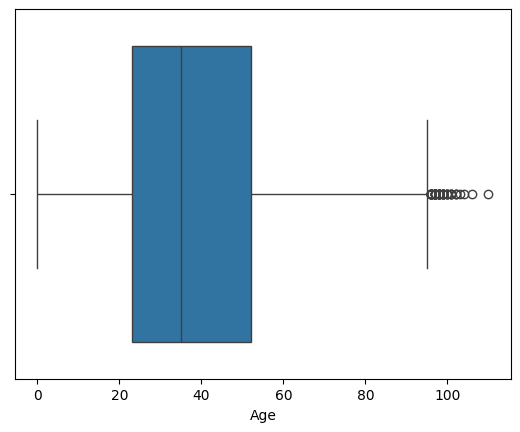

In [69]:
df_merge["Age"] = 2023-df_merge["an_nais"]
sns.boxplot(data=df_merge, x=df_merge['Age'])

Nous allons imputer les valeurs manquantes de l'âge par la médiane car elle est moins sensible aux valeurs abbérantes.

In [70]:
df_merge["Age"]=df_merge["Age"].fillna(df_merge["Age"].median())
df_usagers["Age"] = 2023-df_usagers["an_nais"]
df_usagers["Age"]=df_usagers["Age"].fillna(df_usagers["Age"].median())



In [ ]:
###### Faire ceci et le code suivant après la partie des croisements

#recodage des variables trajet et actp de la base usager
df_merge["trajet"]=df_merge["trajet"].replace(0, value=-1)
df_merge["actp"]=df_merge["actp"].replace(0, value=-1)

# variables de type object de la base
df_merge.select_dtypes("object").columns

In [ ]:
# conversion des variables de type object en variables numériques
def replace_pr(val):
    if len(val.split())==1:
        val=val
    else:
        if len(val.split())>1:
            val=val.split()[1]
        else:
            val="-1"
    return val
df_merge["pr"]=df_merge["pr"].apply(func=replace_pr)
df_merge["pr"]=df_merge["pr"].astype(float)
df_merge["pr1"]=df_merge["pr1"].apply(func=replace_pr)
df_merge["pr1"]=df_merge["pr1"].astype(float)
def rep_virgule(val):
    val=val.replace(",",".")
    return val
df_merge["larrout"]=df_merge["larrout"].apply(rep_virgule)
df_merge["larrout"]=df_merge["larrout"].astype(float)
def heure(val):
    val=val.split(":")[0]
    return val
df_merge["hrmn"]=df_merge["hrmn"].apply(func=heure)
df_merge["hrmn"]=df_merge["hrmn"].astype(float)

df_merge["nbv"]=df_merge["nbv"].str.strip()
df_merge["nbv"]=df_merge["nbv"].replace("#VALEURMULTI","-1")
df_merge["nbv"]=df_merge["nbv"].astype(float)

df_merge["actp"]=df_merge["actp"].replace(["A","B"],["10","11"])
df_merge["actp"]=df_merge["actp"].astype(float)

## **II- Analyses descriptives**

Dans cette partie, nous ferrons essentiellement de l'analyse descriptive univariée et bivariée. De manière plus précise, il s'agira de visualiser la distribution des variables des différentes bases individuellement ou en croisant avec d'autres variables.

### 1- Description de la base usagers

Selon le "Guide BAAC 2017" un usager est une personne physique impliquée dans un accident de la circulation en tant que conducteur/passager d'un véhicule ou piéton.

In [71]:
#Mapping 
sexe_labels = {1: 'Masculin', 2: 'Féminin', -1: 'Autres'}
catu_labels = {1: 'Conducteur', 2: 'Passager', 3: 'Piéton'}
grav_labels = {1: 'Indemne', 2: 'Tué', 3: 'Blessé hospitalisé > 24h', 4: 'Blessé léger',-1: 'Non renseigné'}
secu1_labels = {
    -1: "Non renseigné",
    0: "Aucun équipement",
    1: "Ceinture",
    2: "Casque",
    3: "Dispositif enfants",
    4: "Gilet réfléchissant",
    5: "Airbag (2RM/3RM)",
    6: "Gants (2RM/3RM)",
    7: "Gants + Airbag (2RM/3RM)",
    8: "Non déterminable",
    9: "Autre"
}

secu2_labels = {
    -1: "Non renseigné",
    0: "Aucun équipement",
    1: "Ceinture",
    2: "Casque",
    3: "Dispositif enfants",
    4: "Gilet réfléchissant",
    5: "Airbag (2RM/3RM)",
    6: "Gants (2RM/3RM)",
    7: "Gants + Airbag (2RM/3RM)",
    8: "Non déterminable",
    9: "Autre"
}

secu3_labels = {-1: "Non renseigné",0: "Aucun équipement",1: "Ceinture",2: "Casque",3: "Dispositif enfants",4: "Gilet réfléchissant",
    5: "Airbag (2RM/3RM)",
    6: "Gants (2RM/3RM)",
    7: "Gants + Airbag (2RM/3RM)",
    8: "Non déterminable",
    9: "Autre"}
locp_labels = {
    -1: 'Non renseigné',
    0: 'Sans objet',
    1: 'A + de 50 m du passage piéton',
    2: 'A - de 50 m du passage piéton',
    3: 'Sans signalisation lumineuse',
    4: 'Avec signalisation lumineuse',
    5: 'Trottoir',
    6: 'Sur accotement',
    7: 'Sur refuge ou BAU',
    8: 'Sur contre-allée',
    9: 'Inconnue'
}                                                                                                                                  
actp_labels = {
    ' -1': 'Non renseigné',
    '0': 'Sans objet',
    '1': 'Sens du véhicule heurtant',
    '2': 'Sens inverse du véhicule heurtant',
    '3': 'Traversant',
    '4': 'Masqué',
    '5': 'Jouant-courant',
    '6': 'Avec animal',
    '7': 'Quitte l arrêt du TC',
    '8': 'Accède à l arrêt du TC',
    '9': 'Autre',
    'A': 'Monte ou descend de son véhicule', 
    'B': 'Inconnu'  
}

etatp_labels = {
    -1:'Non renseigné',
    0: 'Sans objet',
    1: 'Seul',
    2: 'Accompagé',
    3: 'En groupe'
}
trajet_labels = {
    -1:'Non renseigné',
    0: 'Non renseigné',
    1: 'Domicile-travail',
    2: 'Domicile-école',
    3: 'Courses-achats',
    4: 'Utilisation professionnelle',
    5: 'Promenade-loisirs',
    9: 'Autre'
}


In [72]:
missing_percentage = (df_usagers.isnull().sum() / len(df_usagers)) * 100
print("Pourcentage de valeurs manquantes par variable :")
print(missing_percentage)

Pourcentage de valeurs manquantes par variable :
Num_Acc        0.000000
id_usager      0.000000
id_vehicule    0.000000
num_veh        0.000000
place          0.000000
catu           0.000000
grav           0.000000
sexe           0.000000
an_nais        2.065363
trajet         0.000000
secu1          0.000000
secu2          0.000000
secu3          0.000000
locp           0.000000
actp           0.000000
etatp          0.000000
Age            0.000000
dtype: float64


In [73]:
def mapping_apply(data,mapping_dict):
    for column, mapping in mapping_dict.items():
        if column in data.columns: 
            data[column] = data[column].map(mapping)

In [74]:
mapping_dict1 = {
    "sexe": sexe_labels,
    "catu": catu_labels,
    "grav": grav_labels,
    "trajet": trajet_labels,
    "secu1": secu1_labels,
    "secu2": secu2_labels,
    "secu3": secu3_labels,
    "locp": locp_labels,
    "actp": actp_labels,
    "etatp": etatp_labels}
mapping_apply(df_usagers,mapping_dict1)

In [75]:
def plot_all_distributions1(df, columns):
    """
    Représente les distributions des variables catégorielles dans un seul cadran avec des sous-graphiques.
    
    Paramètres:
    df : DataFrame pandas contenant les données
    columns : Liste des colonnes catégorielles à représenter
    """
    # Dictionnaire pour mapper les variables aux titres
    column_titles = {
        "catu":"Categorie_vehicule",
        "grav":"Gravite de blessure de l usager",
        "trajet":"Motif du deplacement au moment de l accident",
        "secu1":"Equipement de securite 1",
        "secu2":"Equipement de securite 2",
        "secu3":"Equipement de securite 3",
        "locp":"Localisation du pieton",
        "actp":"Action du pieton",
        "etatp":"Etat du pieton",
        "senc": "Sens de circulation",
        "obs": "Obstacles fixes heurtés",
        "obsm": "Obstacle mobile heurté",
        "choc": "Point de choc initial",
        "manv": "Manœuvre principale avant accident",
        "motor": "Type de motorisation du véhicule",
        "place": "place"
    }
    
    # Définir le nombre de lignes et de colonnes pour les subplots
    n_cols = 2  # Nombre de colonnes par ligne pour agrandir les graphiques
    n_rows = (len(columns) + n_cols - 1) // n_cols  # Nombre total de lignes (arrondi vers le haut)
    
    # Initialiser la figure avec une taille plus grande
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 6 * n_rows))
    axes = axes.flatten()  # Aplatir le tableau des axes pour un accès facile
    
    # Parcourir les colonnes pour créer chaque graphique
    for i, column in enumerate(columns):
        sns.countplot(data=df, x=column, palette='viridis', ax=axes[i])
        title = column_titles.get(column, column)  # Récupérer le titre ou le nom de la colonne par défaut
        axes[i].set_title(f"Distribution de '{title}'", fontsize=14)
        axes[i].set_xlabel(title, fontsize=12)
        axes[i].set_ylabel("Fréquence", fontsize=12)
        axes[i].tick_params(axis='x', rotation=60)
        
        # Ajouter les valeurs au-dessus des barres
        for p in axes[i].patches:
            axes[i].annotate(f'{int(p.get_height())}',
                             (p.get_x() + p.get_width() / 2., p.get_height()),
                             ha='center', va='center',
                             fontsize=10, color='black',
                             xytext=(0, 5), textcoords='offset points')
        
    # Supprimer les axes vides si le nombre de graphiques est inférieur aux subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
        
    plt.tight_layout()
    plt.show()

In [76]:
columns1 =["catu","grav","trajet","sexe"]
columns2 =["secu1","secu2","secu3","place"]
columns3 =["locp","actp","etatp"]

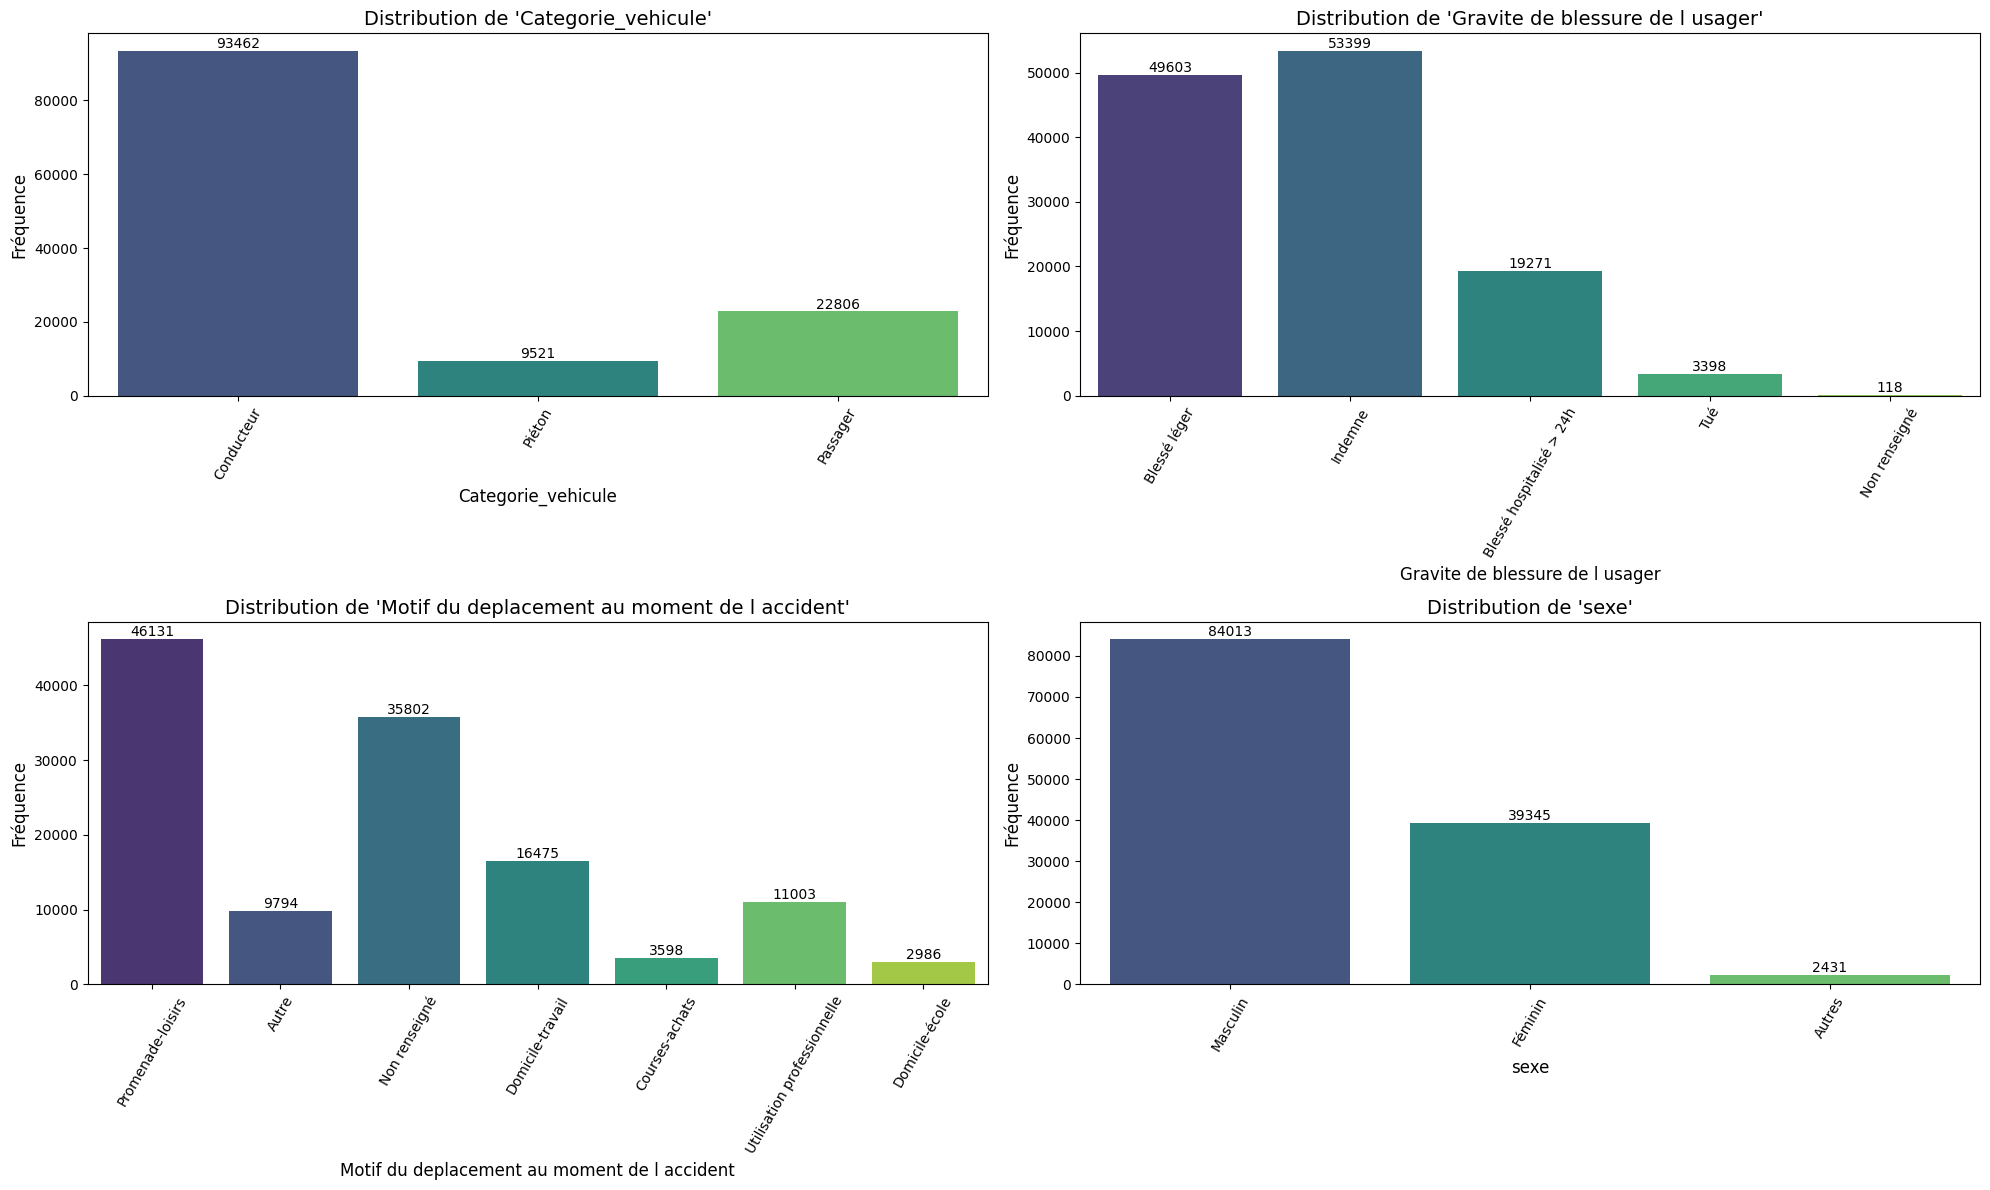

In [77]:
plot_all_distributions1(df_usagers, columns1)

#### Catégorie d'usagers (catu) : Identification des catégories les plus exposées (conducteurs, passagers, piétons).
On observe que la majorité des personnes impliquées dans des accidents sont des conducteurs(soit 93462 usagers), ensuite vient les passagers (22806 usagers) et enfin les piétons (9521 usagers).

#### Répartition selon la gravité (grav) : Observation de la distribution des niveaux de gravité des accidents.
Les résultats montrent que la majorité des usagers impliqués dans les accidents (53339) sont indemnes, ce qui indique que les accidents sont souvent de faible gravité. Aussi, un nombre importante (49603) ont entrainé des blessures légères. 
Il en ressort également un résultats alarmant selon lequel 19271 des cas d'accidents ont entrainé des blessures graves et nécessitent
une hospitalisation de plus de 24 heures et 3398 accidents ont entrainé la mort des usagers

#### Analyse des trajets
Les statistiques montrent que les promenades-loisirs dominent les motifs de déplacement des usagers impliqués dans des accidents avec une fréquence de 46131, suivies des trajets non renseignés (33303).
Les trajets domicile-travail (16475) et utilisation professionnelle (11003) révèlent l'importance des déplacements liés à l'activité professionnelle, totalisant une fréquence de 27478, et pointent des enjeux spécifiques comme les risques associés aux heures de pointe, au stress, et à la fatigue. Les trajets domicile-école (2986) et les déplacements pour courses-achats (3598) sont les moins employés.

#### Sexe
La majorité des usagers impliqués dans les accidents sont de sexe masculin, représentant 66,8% du total. Cela suggère que, dans cette population, les hommes sont nettement plus nombreux que les femmes à être impliqués dans des accidents.Les femmes représentent 31,3% des usagers impliqués et la catégorie "autres" représente 1,9% des cas, ce qui pourrait inclure des personnes dont le sexe n'est pas précisé ou qui ne s'identifient pas selon les catégories traditionnelles de sexe. Cette proportion est relativement faible, mais elle mérite d'être mentionnée.

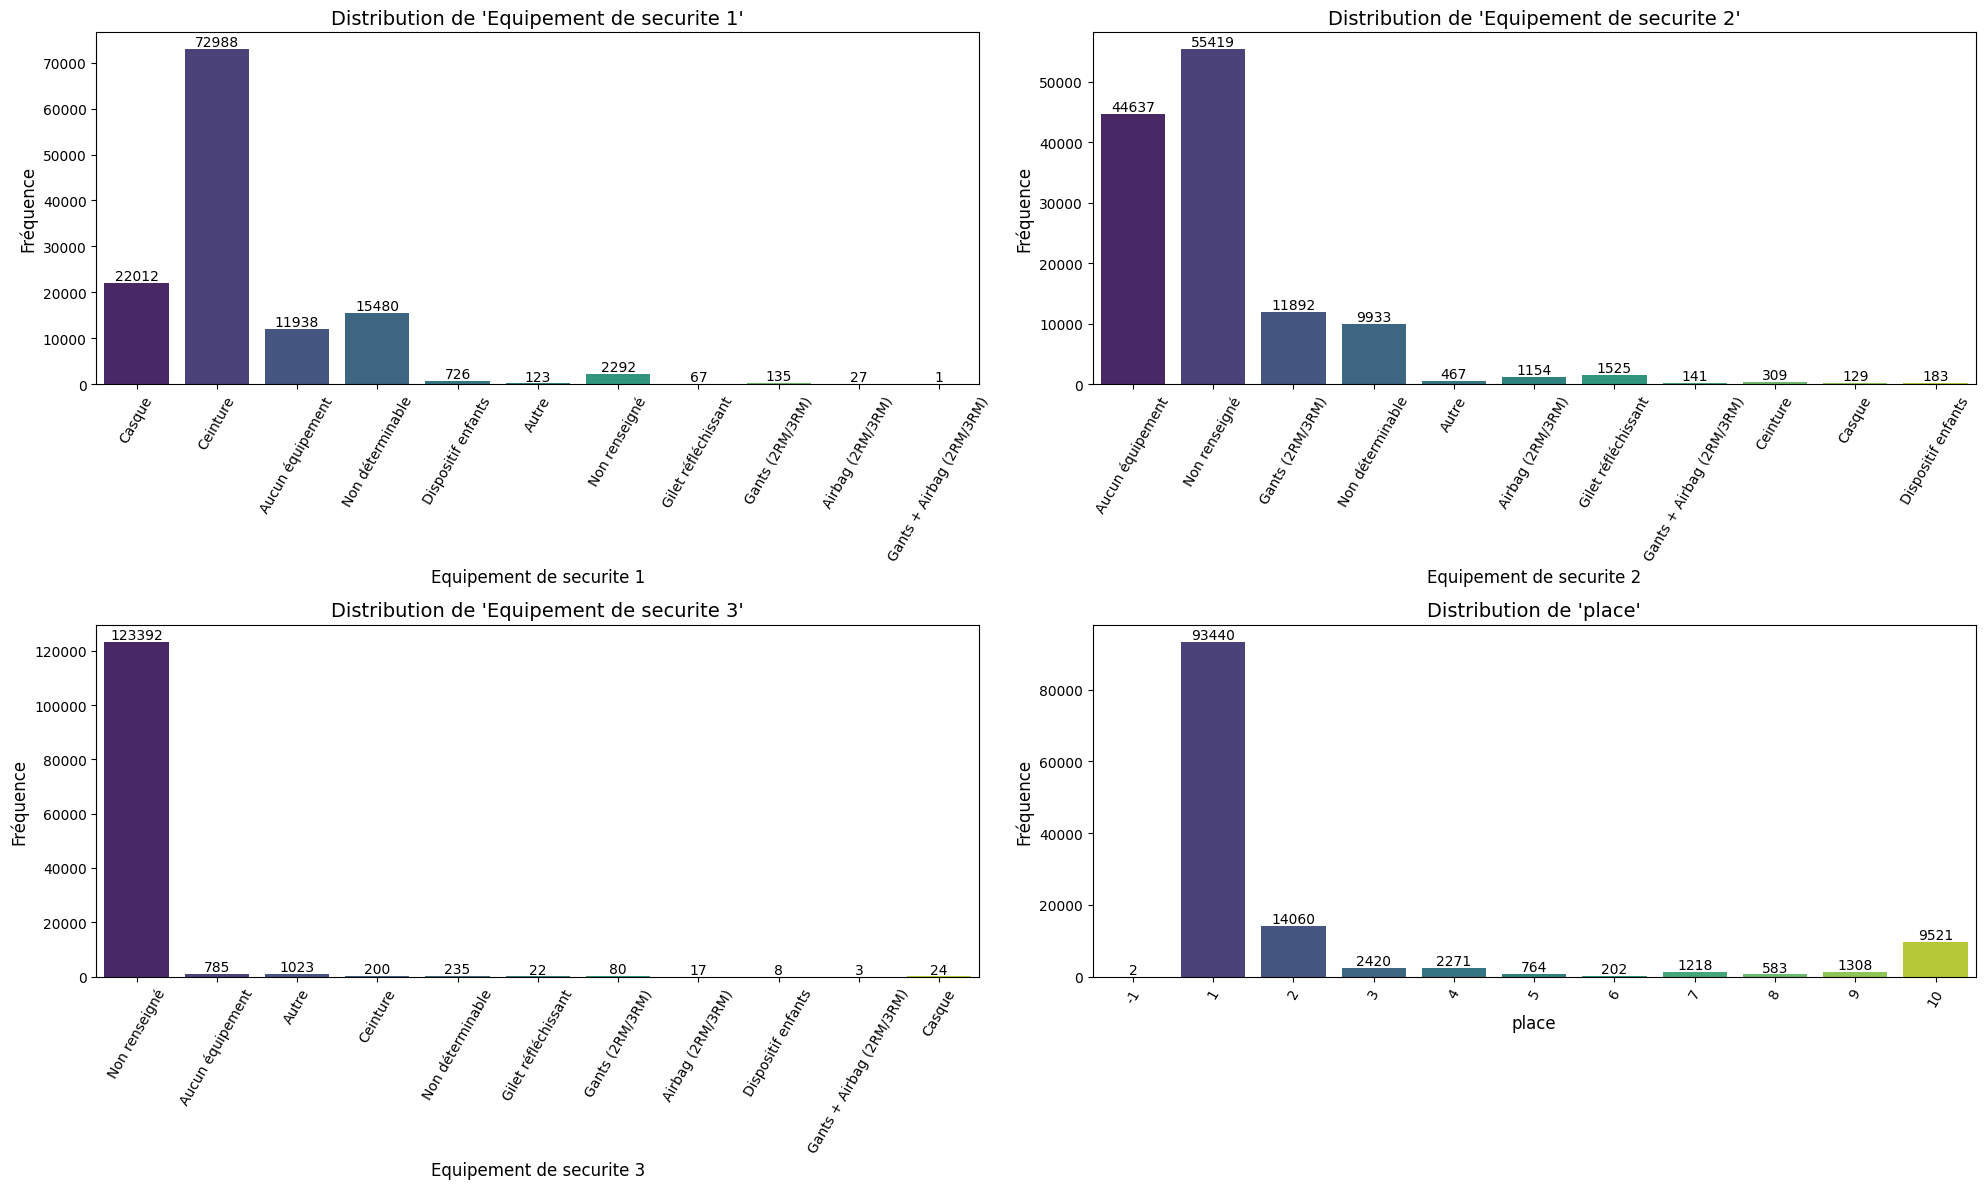

In [78]:
plot_all_distributions1(df_usagers, columns2)

#### Répartition des dispositifs de sécurité (Secu1 et Secu2)

En examinant la répartition des dispositifs de sécurité secu1, on constate que la ceinture 
de sécurité est l'équipement le plus fréquemment utilisé, avec 72988 des usagers tandis que les dispositifs pour enfants représentent 
une part marginale, à 726 utilisations.

Pour secu2, une majorité (44637 utilisations) des usagers impliqués dans les accidents ne portaient aucun équipement. Parmi ceux qui portaient des équipements, les gants (2/3 RM) sont les plus courants (11892 utilisations), suivis des gilets réfléchissants (1525) et des airbags personnels (2/3 RM) (1154). Les autres équipements et les combinaisons airbag personnel + gants (2/3 RM) sont les moins utilisés (467 et 141 utilisations respectivement).

secu3 ne sera pas analysé car pratiquement toutes les observations sont non renseignées.

#### Place
La variable "place" indique la position occupée par les usagers dans le véhicule au moment de l’accident. Les résultats montrent que la majorité des usagers se trouvent en position "1" (93 440 usagers), correspondant probablement au conducteur, suivie par la position "2" (14 060 usagers), qui représente vraisemblablement un passager avant. La position "10", qui concerne les piétons, regroupe 9 521 individus, tandis que les positions "8" (583 usagers) et "6" (202 usagers), probablement liées à des sièges spécifiques à l’arrière ou à des configurations de véhicules moins fréquentes comme les transports en commun ou les deux-roues, affichent les plus faibles fréquences. Ces résultats pourraient s’expliquer par une plus grande exposition des conducteurs et passagers avant dans les accidents, alors que les places moins accessibles ou moins utilisées sont naturellement sous-représentées. La proportion notable de piétons illustre également leur vulnérabilité dans les accidents de la route.

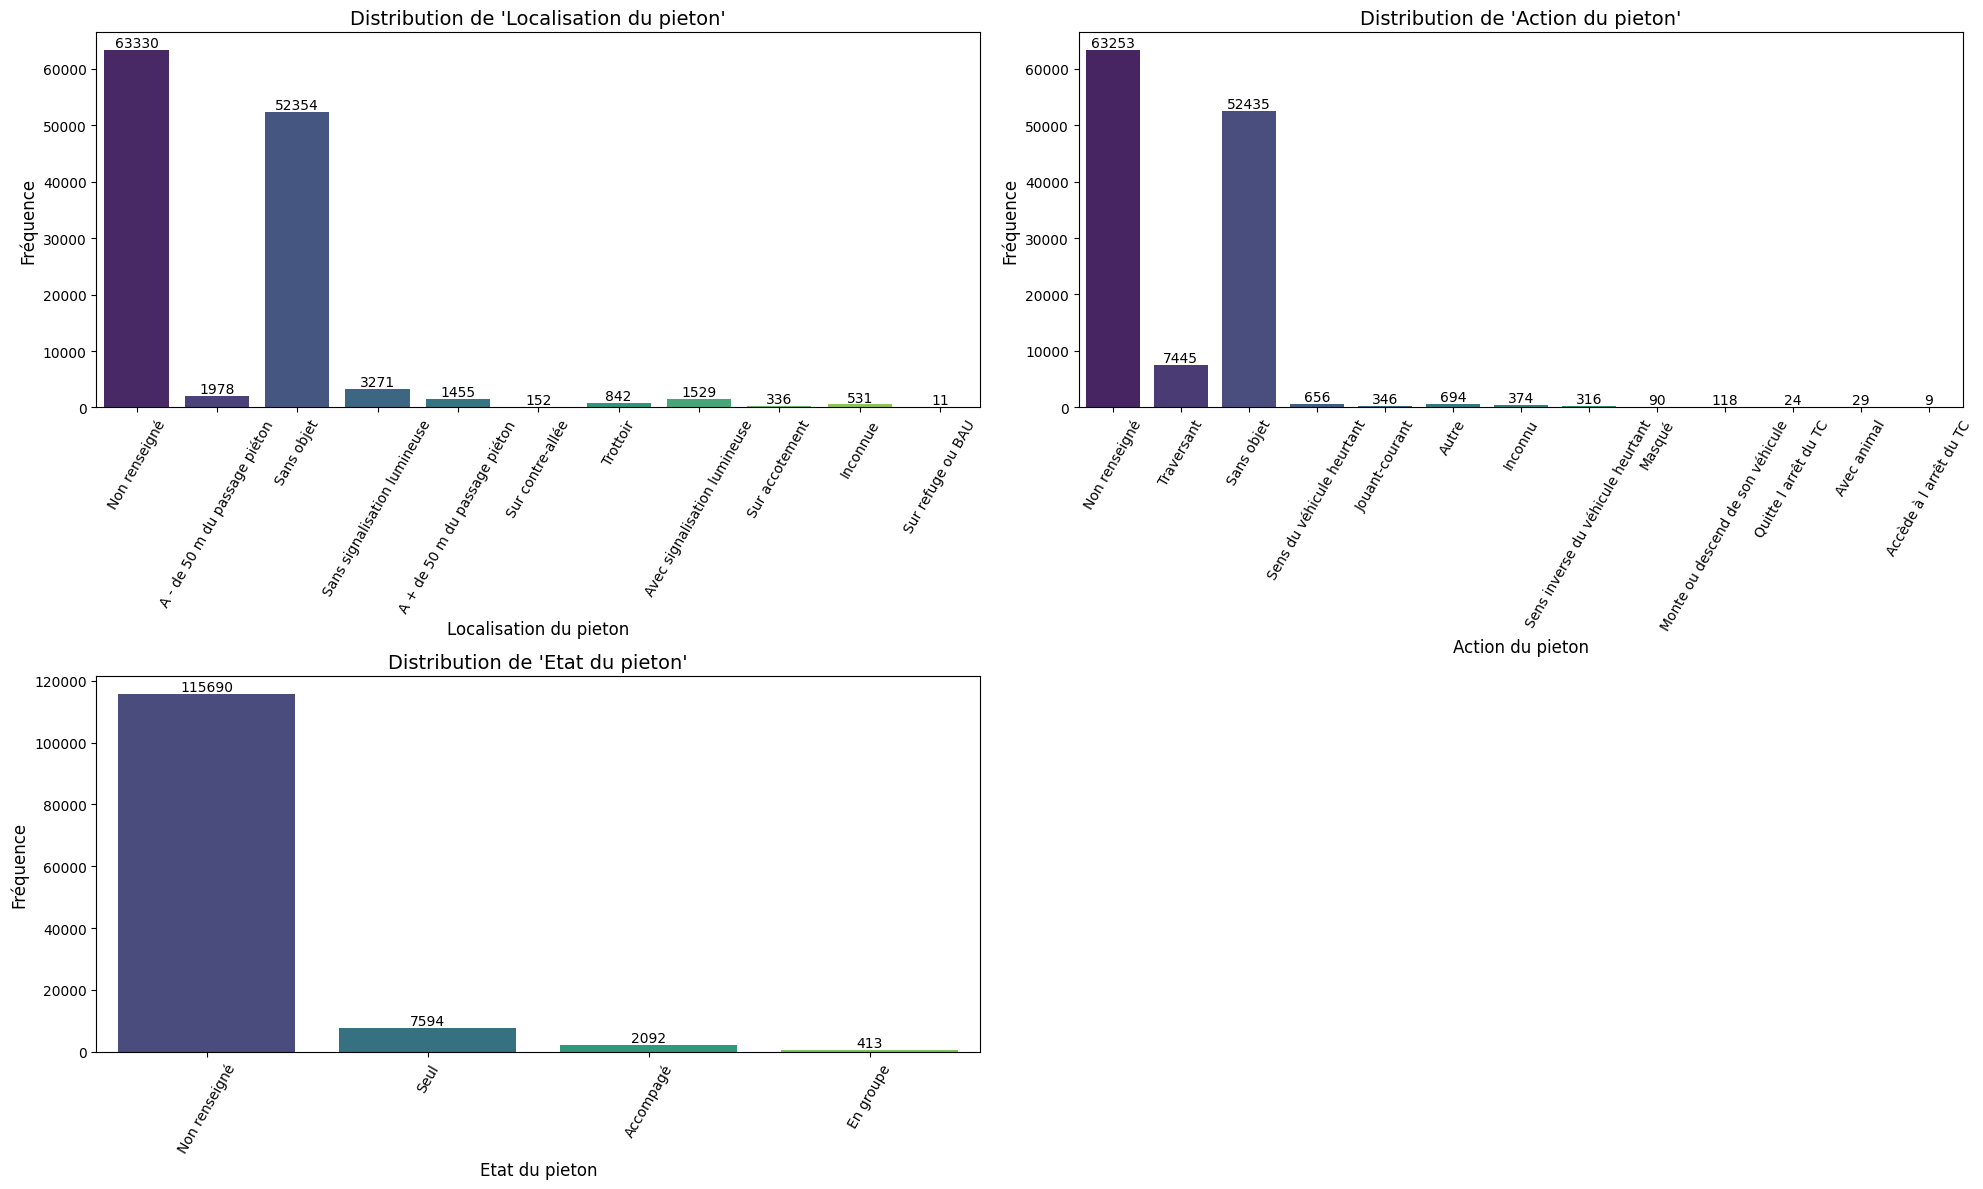

In [79]:
plot_all_distributions1(df_usagers, columns3)

#### Localisation du piéton (locp_label) :
La majorité des piétons (84,5 %) se trouvent dans des zones sans objet de localisation précise.Cela pourrait être dû au fait que la base n'incorpore pas les corrections des erreurs de saisie. Parmi les autres catégories renseignés, la majorité des usagers se trouvent dans des lieux sans signalisation lumineuse (5.3%), ensuite vient ceux se trouvant à moins de 50 mètre du passage piéton (3,2%). Un peu plus de 2 % des piétons se trouvent dans des zones à plus de 50 mètres du passage piéton. La localisation précise de l'accident est inconnue dans moins de 1 % des cas (Inconnu), et seules de rares observations concernent des piétons sur des trottoirs (1,4 %) ou sur des accotements (0,5 %).

#### Action du piéton (actp_label) :
La majorité des piétons (Supérieur 80 % des piétons) sont dans une situation où l'action est considérée comme "sans objet" ou "non renseigné". Parmi les actions renseignées,les actions les plus fréquentes sont les piétons traversant (11,9 %) ou des actions considérées comme "autres" (1,1 %). Les cas où le piéton est heurté dans le sens du véhicule sont relativement moins fréquents (1 %), tout comme les situations où il se trouve dans le sens inverse du véhicule heurtant (0,5 %). D'autres actions comme "jouant-courant", "avec animal" ou "masqué" sont très peu fréquentes, avec des proportions inférieures à 1 %, et les cas où le piéton monte ou descend de son véhicule ou accède à un arrêt de transport en commun sont rares (moins de 0,2 %). Cela pourrait envisager des mesures de sensibilisation concernant le code de la route. 

#### État du piéton (etatp_label) :
La grande majorité des piétons sont seuls lors de l'accident (75,2 %), suivi d'une proportion importante de cas où ils sont accompagnés (20,7 %). Les cas où le piéton est en groupe sont beaucoup moins fréquents, représentant seulement 4,1 % des observations. Cela pourrait être dû au fait que ceux qui sont seul sont les plus exposés aux accidents. 

Repartition selon l'âge

╒═══════════════╤═══════════╕
│ Statistique   │    Valeur │
╞═══════════════╪═══════════╡
│ Nombre        │ 123191    │
├───────────────┼───────────┤
│ Moyenne       │     38.75 │
├───────────────┼───────────┤
│ Écart-type    │     19.1  │
├───────────────┼───────────┤
│ Min           │      0    │
├───────────────┼───────────┤
│ 25%           │     23    │
├───────────────┼───────────┤
│ 50% (médiane) │     35    │
├───────────────┼───────────┤
│ 75%           │     52    │
├───────────────┼───────────┤
│ Max           │    110    │
╘═══════════════╧═══════════╛


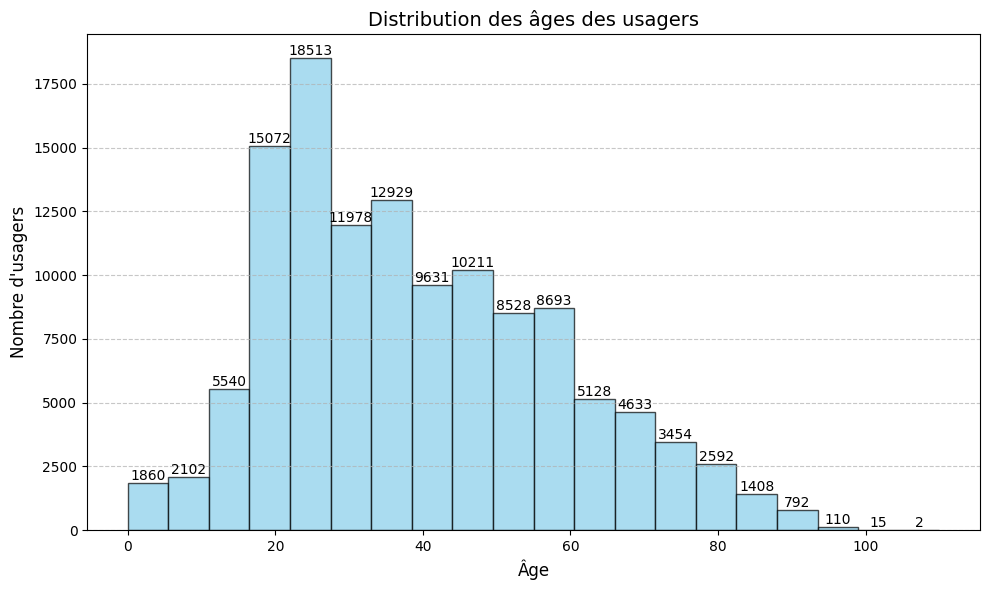

In [80]:
df_usagers['age'] = 2023 - df_usagers['an_nais']
# Calcul des statistiques descriptives
age_stats = df_usagers['age'].describe()

age_summary = pd.DataFrame({'Statistique': ['Nombre', 'Moyenne', 'Écart-type', 'Min', '25%', '50% (médiane)', '75%', 'Max'],'Valeur': [int(age_stats['count']),round(age_stats['mean'], 2),round(age_stats['std'], 2),int(age_stats['min']),int(age_stats['25%']),int(age_stats['50%']),int(age_stats['75%']),int(age_stats['max']),]})
print(tabulate(age_summary, headers='keys', tablefmt='fancy_grid', showindex=False))
# Histogramme
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(df_usagers['age'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
# Ajouter les chiffres au-dessus de chaque barre
for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width() / 2,  # Position X au centre de la barre
             patches[i].get_height(),  # Position Y à la hauteur de la barre
             f'{int(n[i])}',  # Afficher le nombre d'usagers
             ha='center', va='bottom', fontsize=10, color='black')

plt.title('Distribution des âges des usagers', fontsize=14)
plt.xlabel('Âge', fontsize=12)
plt.ylabel('Nombre d\'usagers', fontsize=12)
# Grille et ajustement
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

La population analysée, composée de 123 191 usagers, présente un âge moyen de 38,75 ans, avec une dispersion modérée (écart-type de 19,1 ans) 
et une médiane de 35 ans, indiquant que la moitié des individus a cet âge ou moins. La majorité des usagers se situe entre 23 ans (1er quartile) 
et 52 ans (3e quartile), avec des âges extrêmes allant de 0 à 110 ans, bien que ces valeurs puissent inclure des erreurs ou des cas particuliers.
La distribution par tranche d'âge révèle une forte proportion de jeunes (11,2 % entre 10 et 19 ans) et une concentration probable dans les tranches d'âge actif (20-49 ans),
tandis que les individus très âgés (100 ans et plus) restent marginaux (0,01 %). Cette structure reflète une population principalement jeune et adulte.

### 2)- Description de la base vehicules

Dictionnaire des variables

In [82]:
#Sens de circulation 
senc_labels = {
    -1: 'Non renseigné',
    0: 'Inconnu',
    1: 'PK ou PR ou numéro d\'adresse postale croissant',
    2: 'PK ou PR ou numéro d\'adresse postale décroissant',
    3: 'Absence de repère'
}
#obstacles_fixes_heurte
obs_labels = {
    -1: "Non renseigné",
    0: "Sans objet",
    1: "Véhicule en stationnement",
    2: "Arbre",
    3: "Glissière métallique",
    4: "Glissière béton",
    5: "Autre glissière",
    6: "Bâtiment, mur, pile de pont",
    7: "Support de signalisation verticale ou poste d’appel d’urgence",
    8: "Poteau",
    9: "Mobilier urbain",
    10: "Parapet",
    11: "Ilot, refuge, borne haute",
    12: "Bordure de trottoir",
    13: "Fossé, talus, paroi rocheuse",
    14: "Autre obstacle fixe sur chaussée",
    15: "Autre obstacle fixe sur trottoir ou accotement",
    16: "Sortie de chaussée sans obstacle",
    17: "Buse – tête d’aqueduc"
}
#Catégorie du véhicule
catv_labels = {
    -1:"Non renseigné",
    0: "Indéterminable",
    1: "Bicyclette",
    2: "Cyclomoteur <50cm3",
    3: "Voiturette (Quadricycle à moteur carrossé) (anciennement 'voiturette ou tricycle à moteur')",
    4: "Référence inutilisée depuis 2006 (scooter immatriculé)",
    5: "Référence inutilisée depuis 2006 (motocyclette)",
    6: "Référence inutilisée depuis 2006 (side-car)",
    7: "VL seul",
    8: "Référence inutilisée depuis 2006 (VL + caravane)",
    9: "Référence inutilisée depuis 2006 (VL + remorque)",
    10: "VU seul 1,5T <= PTAC <= 3,5T avec ou sans remorque (anciennement VU seul 1,5T <= PTAC <= 3,5T)",
    11: "Référence inutilisée depuis 2006 (VU (10) + caravane)",
    12: "Référence inutilisée depuis 2006 (VU (10) + remorque)",
    13: "PL seul 3,5T <PTCA <= 7,5T",
    14: "PL seul > 7,5T",
    15: "PL > 3,5T + remorque",
    16: "Tracteur routier seul",
    17: "Tracteur routier + semi-remorque",
    18: "Référence inutilisée depuis 2006 (transport en commun)",
    19: "Référence inutilisée depuis 2006 (tramway)",
    20: "Engin spécial",
    21: "Tracteur agricole",
    30: "Scooter < 50 cm3",
    31: "Motocyclette > 50 cm3 et <= 125 cm3",
    32: "Scooter > 50 cm3 et <= 125 cm3",
    33: "Motocyclette > 125 cm3",
    34: "Scooter > 125 cm3",
    35: "Quad léger <= 50 cm3 (Quadricycle à moteur non carrossé)",
    36: "Quad lourd > 50 cm3 (Quadricycle à moteur non carrossé)",
    37: "Autobus",
    38: "Autocar",
    39: "Train",
    40: "Tramway",
    41: "3RM <= 50 cm3",
    42: "3RM > 50 cm3 <= 125 cm3",
    43: "3RM > 125 cm3",
    50: "EDP à moteur",
    60: "EDP sans moteur",
    80: "VAE",
    99: "Autre véhicule"
}
#Obstacle mobile heurté
obsm_labels = {
    -1: "Non renseigné",
    0: "Aucun",
    1: "Piéton",
    2: "Véhicule",
    4: "Véhicule sur rail",
    5: "Animal domestique",
    6: "Animal sauvage",
    9: "Autre"
}
#point_de_choc_initial
choc_labels = {
    -1: "Non renseigné",
    0: "Aucun",
    1: "Avant",
    2: "Avant droit",
    3: "Avant gauche",
    4: "Arrière",
    5: "Arrière droit",
    6: "Arrière gauche",
    7: "Côté droit",
    8: "Côté gauche",
    9: "Chocs multiples (tonneaux)"
}
#manoeuvre_principale_avant_accident
manv_labels= {
    -1: "Non renseigné",
    0: "Inconnue",
    1: "Sans changement de direction",
    2: "Même sens, même file",
    3: "Entre 2 files",
    4: "En marche arrière",
    5: "A contresens",
    6: "En franchissant le terre-plein central",
    7: "Dans le couloir bus, dans le même sens",
    8: "Dans le couloir bus, dans le sens inverse",
    9: "En s’insérant",
    10: "En faisant demi-tour sur la chaussée",
    11: "Changeant de file",
    12: "Changeant de file",
    13: "Déporté",
    14: "Déporté",
    15: "Tournant",
    16: "Tournant",
    17: "Dépassant",
    18: "Dépassant",
    19: "Divers",
    20: "Divers",
    21: "Divers",
    22: "Divers",
    23: "Divers",
    24: "Divers",
    25: "Divers",
    26: "Divers"
}

#type_motorisation_vehicule
motor_labels = {
    -1: "Non renseigné",
    0: "Inconnue",
    1: "Hydrocarbures",
    2: "Hybride électrique",
    3: "Electrique",
    4: "Hydrogène",
    5: "Humaine",
    6: "Autre"
}

In [83]:
mapping_dict2 = {
    "senc": senc_labels,
    "catv": catv_labels,
    "obs": obs_labels,
    "choc": choc_labels,
    "obsm": obsm_labels,
    "manv": manv_labels,
    "motor": motor_labels,
}
mapping_apply(df_vehicules,mapping_dict2)

In [84]:
columns4 = ["senc", "obsm","choc", "motor"]

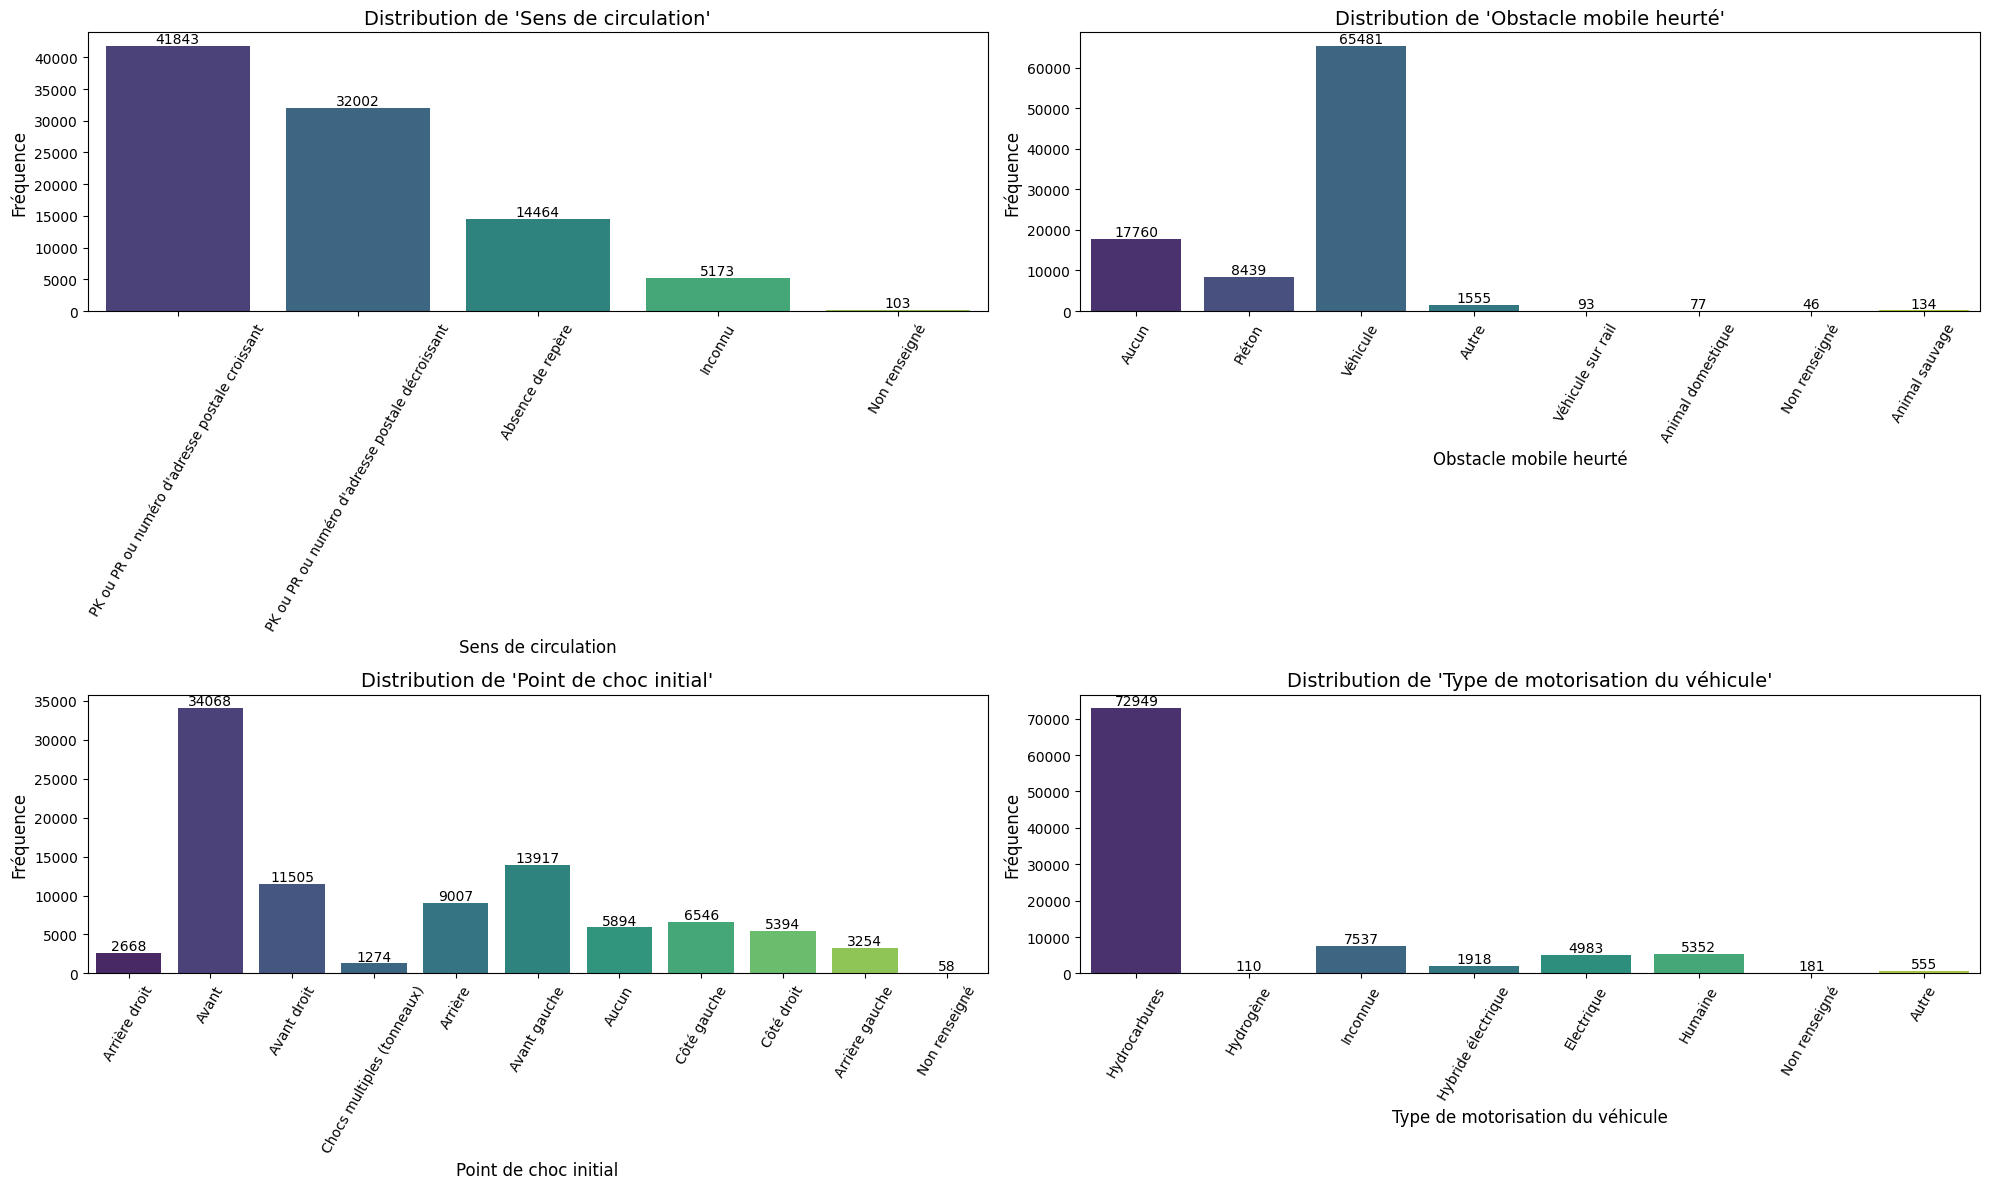

In [85]:
plot_all_distributions1(df_vehicules, columns4)

#### Sens de circulation (senc)
La majorité des usagers impliqués dans des accidents circulaient dans des sens identifiés, tels que "PK ou PR ou numéro d'adresse postale croissant" (41 843 usagers) et "PK ou PR ou numéro d'adresse postale décroissant" (32 002 usagers), tandis qu'une proportion non négligeable (5 173 usagers) a été enregistrée avec un sens de circulation inconnu, ce qui pourrait refléter des lacunes dans la collecte des données ou des situations ambiguës, telles que des accidents survenus à des intersections, dans des zones non balisées, ou impliquant des usagers pour lesquels la direction était difficile à déterminer.

#### Obstacle mobile heurté (obsm)
La majorité des accidents sont associés à des véhicules, représentant 65 481 cas. Les accidents sans obstacle mobile viennent en seconde position avec 17 760 cas, suivis de ceux impliquant des piétons, qui comptent 8 439 cas. Ces chiffres pourraient refléter un non-respect du code de la route ou des comportements imprudents. En revanche, une faible proportion des accidents est liée à des animaux domestiques (77 cas), des animaux sauvages (134 cas) et des véhicules sur rail (93 cas).

#### Point de choc initial (choc)
Les accidents se produisent principalement à l’avant du véhicule (34 068 cas), suivis des collisions à l’avant gauche (13 917 cas) et à l’avant droit (11 505 cas), tandis que les chocs multiples (tonneaux) sont rares (1 274 cas), suggérant que les impacts frontaux sont les plus fréquents, mais que les risques graves, bien que moins fréquents, concernent surtout les accidents complexes et les collisions arrière droit (2 668 cas).

#### Type de motorisation du véhicule (motor)
La distribution du "Type de motorisation du véhicule" montre une nette domination des véhicules à hydrocarbures, avec 72 949 occurrences, ce qui reflète leur omniprésence dans les transports actuels. Les motorisations alternatives, comme l'hydrogène (110 véhicules), les hybrides électriques (1 918 véhicules) et les électriques (4 983 véhicules), affichent des fréquences bien plus faibles, témoignant de leur adoption encore limitée. Les véhicules à propulsion humaine (5 352 cas) et les motorisations "inconnues" (7 537 cas) occupent une part non négligeable, ce qui pourrait s'expliquer par des catégories spécifiques de véhicules ou des limitations dans la collecte des données. Enfin, les catégories "Non renseigné" (181 cas) et "Autre" (555 cas) regroupent des cas marginaux ou non spécifiés. Ces résultats traduisent la prédominance actuelle des véhicules thermiques tout en laissant entrevoir une légère diversification vers des alternatives plus écologiques.

In [86]:
def other_plot(df, column, title, xlabel, ylabel="Frequence", rotation=45, palette='viridis'):
    plt.figure(figsize=(20, 8))
    ax = sns.countplot(x=df[column], palette=palette)
    
    # Ajouter les chiffres sur les barres
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), 
                    textcoords='offset points')
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=rotation)
    plt.show()


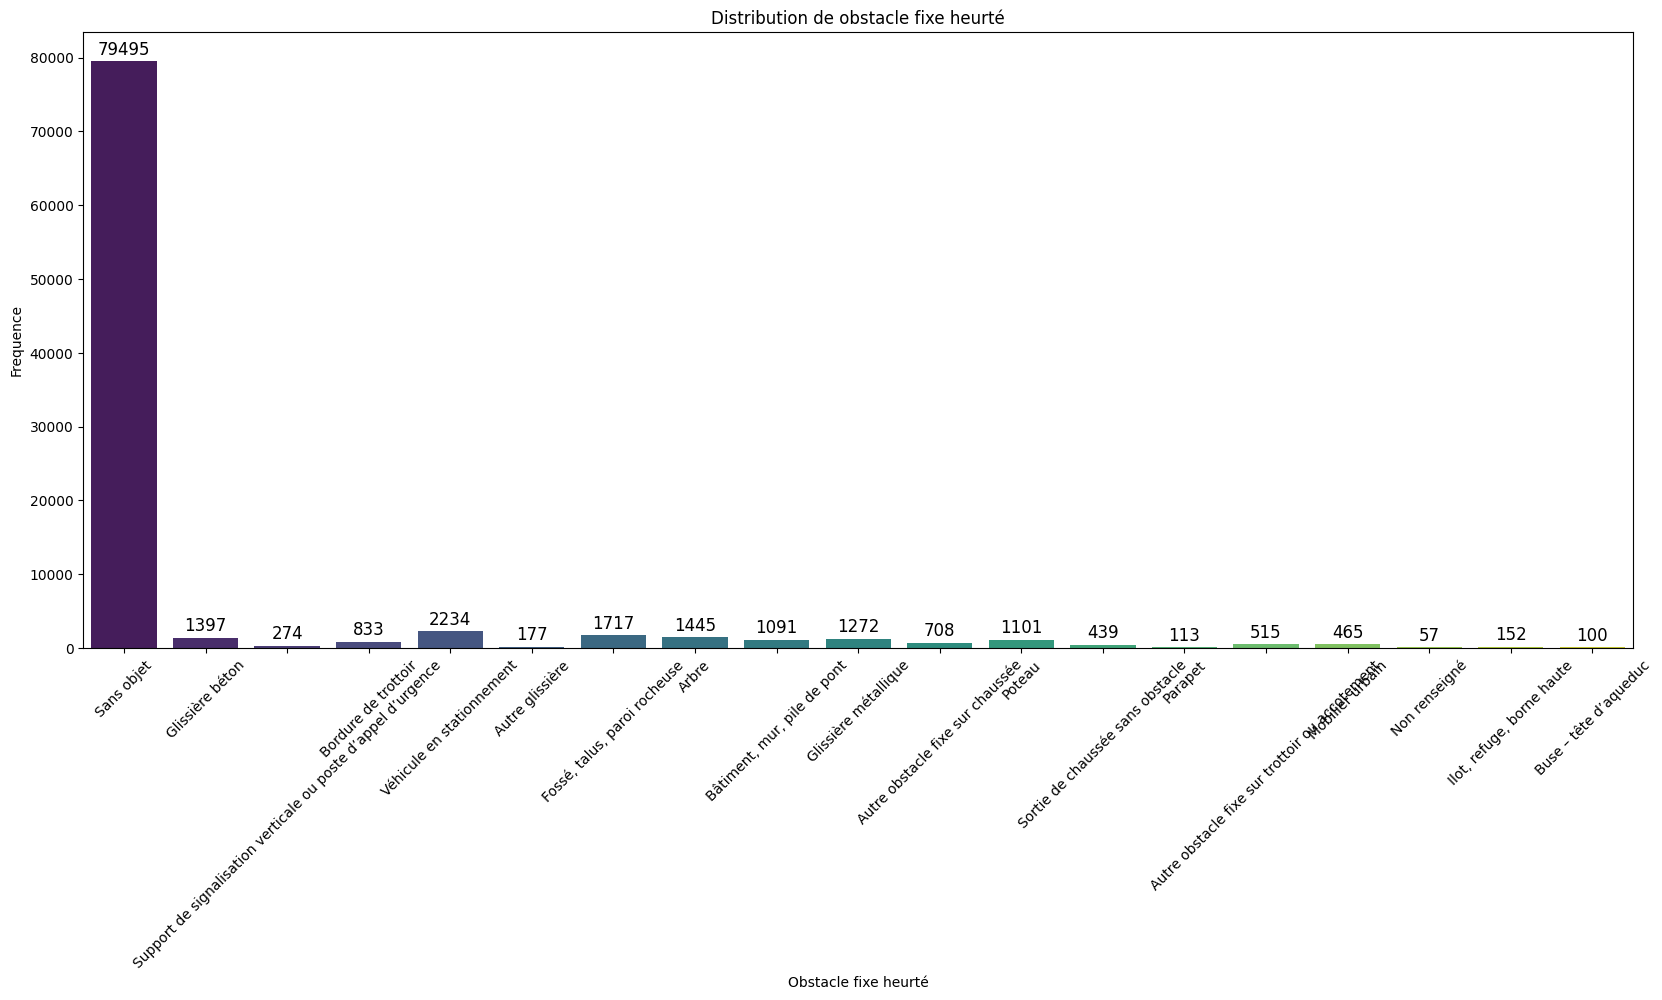

In [87]:
other_plot(df_vehicules, "obs", "Distribution de obstacle fixe heurté", "Obstacle fixe heurté")

#### Obstacle fixe heurté (obs)
La distribution montre que la grande majorité des accidents enregistrés ne sont associés à aucun obstacle fixe heurté, avec 79 495 cas identifiés comme "Sans objet". Parmi les autres obstacles les plus fréquemment heurtés, on trouve les "glissières de béton" (1 397 cas), les "véhicules en stationnement" (2 234 cas), et les "fossés, talus ou parois rocheuses" (1 717 cas), tandis que les obstacles moins courants incluent des "buses - têtes d'aqueduc" (100 cas) et des "îlots-refuges, bornes hautes" (57 cas).

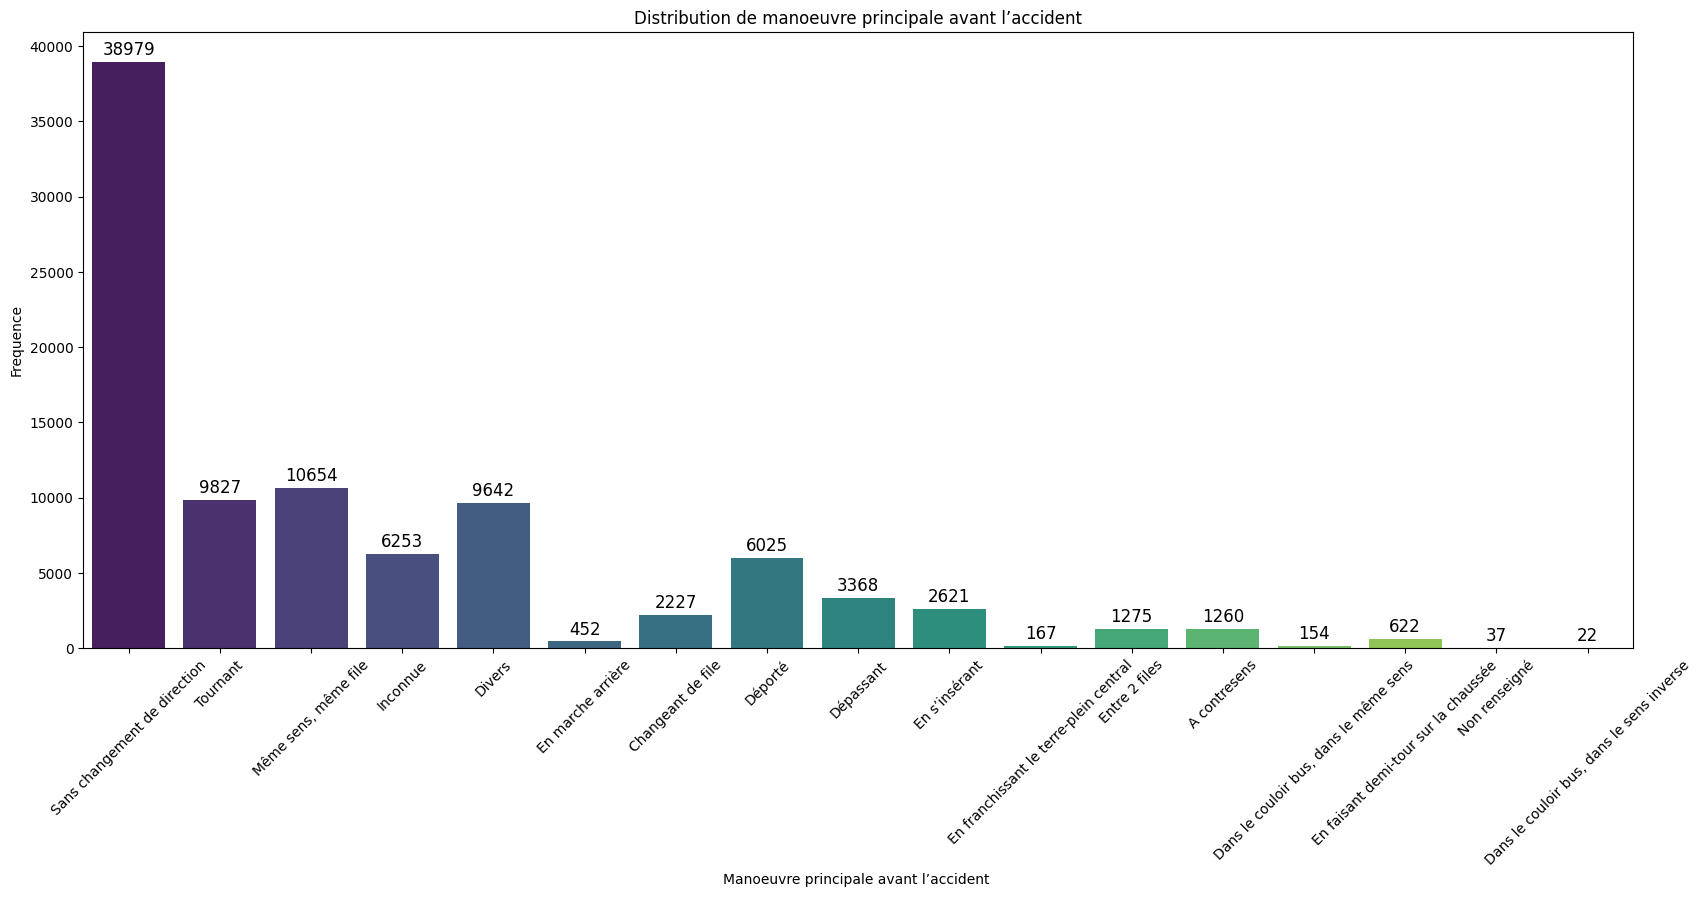

In [88]:
other_plot(df_vehicules, "manv", "Distribution de manoeuvre principale avant l’accident", "Manoeuvre principale avant l’accident ")

#### Manoeuvre principale avant l’accident (manv)
La variable "manœuvre principale avant l'accident" révèle que la majorité des usagers n’effectuaient aucun changement de direction (38 979 cas), ce qui reflète une situation où les accidents surviennent principalement lors de trajets linéaires, sans manœuvres complexes. Les catégories "Même sens, même file" (10 654 cas) et "Tournant" (9 827 cas) représentent également des situations courantes, probablement dues à des erreurs dans des contextes de dépassement ou de virages. Les catégories "Inconnu" (6 253 cas) et "Déporté" (6 025 cas) indiquent des manœuvres moins précises ou des comportements inattendus avant l'accident. Enfin, les fréquences les plus faibles concernent des manœuvres spécifiques comme "Dans le couloir, dans le sens inverse" (22 cas) et "En marche arrière" (452 cas), ce qui peut s’expliquer par leur rareté dans les déplacements habituels. Ces résultats montrent que les accidents sont davantage liés à des situations de conduite courantes qu’à des manœuvres atypiques.

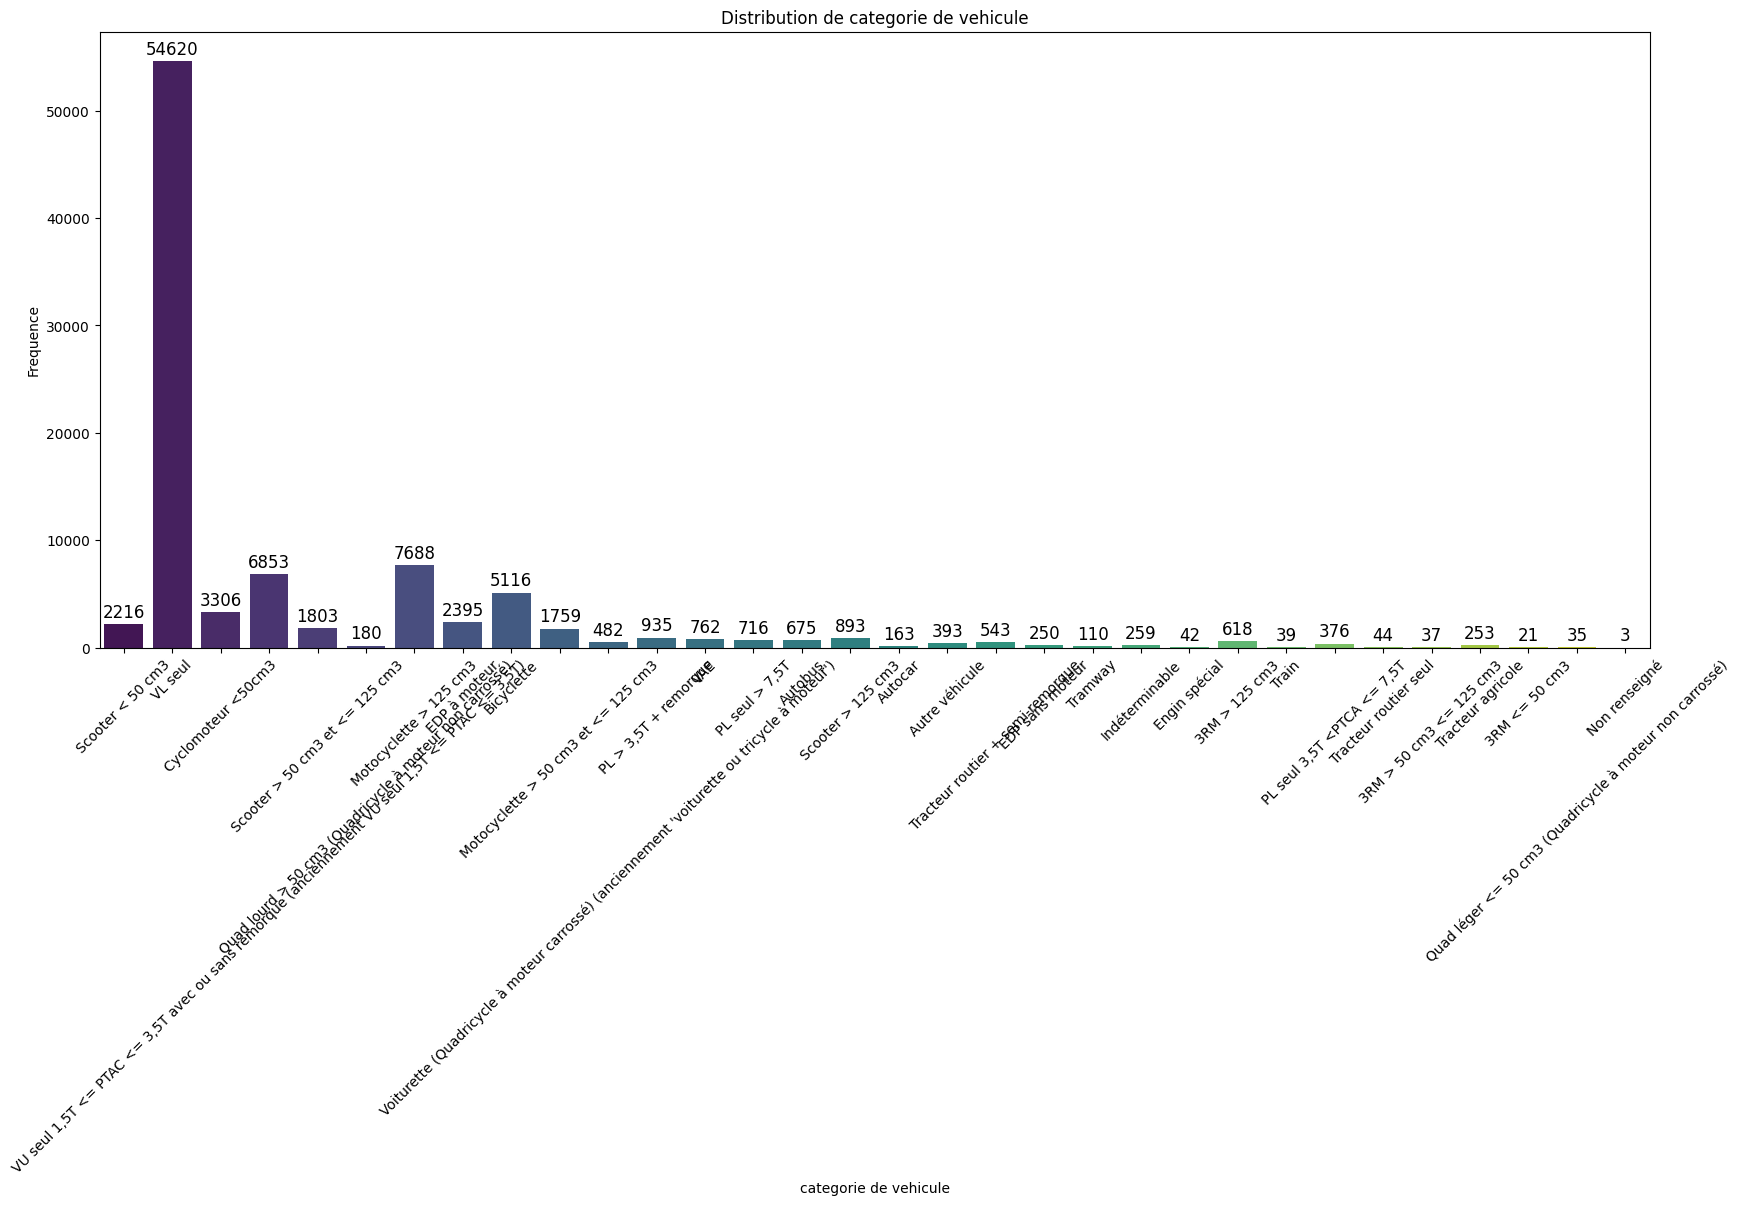

In [89]:
other_plot(df_vehicules, "catv", "Distribution de categorie de vehicule", "categorie de vehicule")

#### categorie de vehicule
La variable "catégorie de véhicule (catv)" montre une nette prédominance des véhicules légers seuls (VL seul), avec 54 620 cas, ce qui reflète leur rôle central dans la majorité des déplacements. Les catégories "EDP à moteur" (7 688 cas) et "Scooter > 50 cm3 et <= 125 cm3" (6 853 cas) occupent également des parts significatives, indiquant leur utilisation fréquente, notamment en milieu urbain. À l'inverse, les véhicules moins courants, comme les "Quads légers <= 50 cm3 (Quadricycles à moteur non carrossés)" (3 cas) et les "3 roues motorisées <= 50 cm3" (21 cas), affichent des fréquences extrêmement faibles. Ces résultats mettent en évidence une concentration des accidents impliquant des véhicules largement répandus et un risque plus limité pour des véhicules moins couramment utilisés, probablement en raison de leur usage spécifique ou restreint.

### Relation variables-target

In [90]:
def diagramme_profils(data, target_var, other_var):
    croisement = pd.crosstab(data[target_var], data[other_var], normalize='index') * 100
    
    ax = croisement.plot(kind='bar', stacked=True, colormap="viridis", figsize=(10, 6))
    
    # Ajouter des numéros sur les barres
    for p in ax.patches:
        height = p.get_height()
        if height > 0:  # Pour éviter d'ajouter un texte si la barre est vide
            ax.text(p.get_x() + p.get_width() / 2, p.get_y() + height / 2, f'{height:.1f}%', 
                    ha='center', va='center', color='white', fontweight='bold')
    
    plt.title(f"Diagramme des profils : {target_var} vs {other_var}")
    plt.ylabel("Pourcentage (%)")
    plt.xlabel(target_var)
    plt.legend(title=other_var, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

In [91]:
def create_profile_table(data, var1, var2):
    
    contingency_table = pd.crosstab(data[var1], data[var2])
    profile_table = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100
    return profile_table

#### gravité (grav) et catégorie de l'usager (catu)

In [92]:
df_merge['grav'] = df_merge['grav'].replace(grav_labels)    
df_merge['catu'] = df_merge['catu'].replace(catu_labels)  
df_merge['secu1'] = df_merge['secu1'].replace(secu1_labels)
df_merge['secu2'] = df_merge['secu2'].replace(secu2_labels)

variables_to_replace = ['grav', 'catu', 'secu1', 'secu2']
for var in variables_to_replace:
    df_merge[var] = df_merge[var].replace("Non renseigné", np.nan)

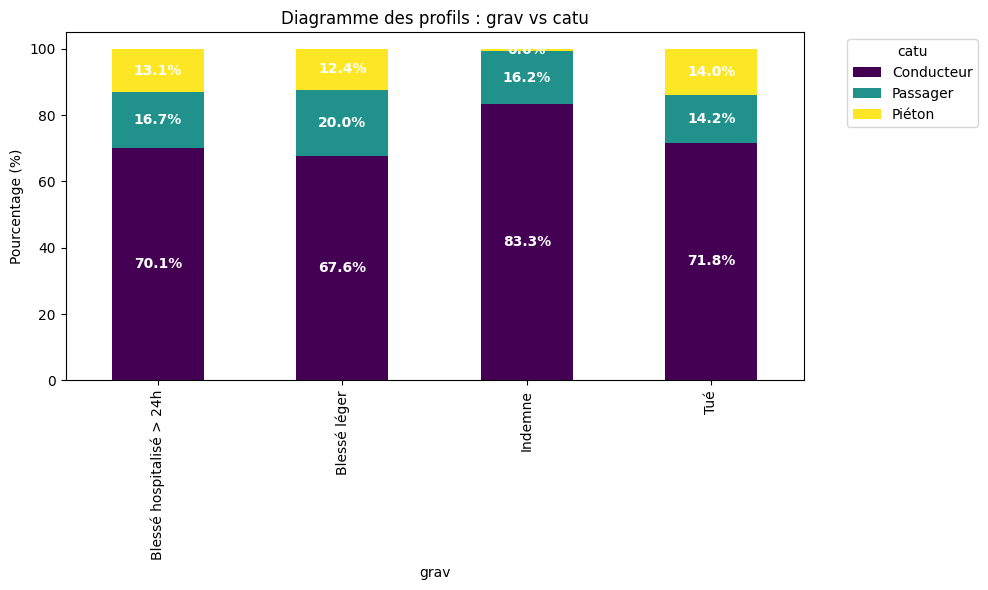

In [93]:
diagramme_profils(df_merge, "grav", "catu")

L'influence de la catégorie d'utilisateur (catu) sur la gravité des blessures (grav) montre que 71,11 % des conducteurs blessés sont hospitalisés plus de 24 heures, 67,6 % subissent des blessures légères et 83,3 % sortent indemnes, bien que 71,8 % des conducteurs décèdent dans l'accident. Chez les passagers, 16,7 % sont hospitalisés plus de 24 heures, 20 % sont légèrement blessés, et 16,2 % sont indemnes, avec 14,2 % de passagers tués. En revanche, les piétons sont beaucoup plus vulnérables, avec seulement 0,6 % indemnes, 13,1 % blessés hospitalisé à plus de 24h et un taux élevé de décès, représentant 14 % des victimes tuées, soulignant leur grande fragilité face aux accidents.

Gravité (grav) et équipement de sécurité1 (secu1)

In [94]:
create_profile_table(df_merge, "grav", "secu1")                   

secu1,Airbag (2RM/3RM),Aucun équipement,Autre,Casque,Ceinture,Dispositif enfants,Gants (2RM/3RM),Gants + Airbag (2RM/3RM),Gilet réfléchissant,Non déterminable
grav,,,,,,,,,,
Blessé hospitalisé > 24h,0.067199,18.152037,0.134397,37.761445,32.070559,0.272995,0.361193,0.0042,0.113398,11.062579
Blessé léger,0.016984,13.338789,0.066393,26.543248,43.893401,0.589816,0.094185,0.0000,0.046321,15.410864
Indemne,0.005867,1.700062,0.067474,3.601080,82.286502,0.641007,0.008801,0.0000,0.014668,11.674539
Tué,0.000000,25.460680,0.545030,26.914093,32.883467,0.207630,0.467168,0.0000,0.233584,13.288347


Les données semblent indiquer une influence du type d’équipement de sécurité (secu1) sur la gravité des blessures (grav). Par exemple, les proportions de blessés hospitalisés sont particulièrement élevées parmi les utilisateurs de casques (37,69 %) et de ceintures (32,00 %), tout en restant significatives pour ceux sans équipement (18,12 %). Concernant les décès, une part importante concerne les individus sans équipement (25,28 %), mais également les utilisateurs de casques (26,72 %) et de ceintures (32,65 %). À l’inverse, la majorité des personnes indemnes portaient une ceinture (79,17 %) ou utilisaient un dispositif pour enfants (61,67 %), suggérant une meilleure protection offerte par ces équipements. Ces résultats mettent en évidence une corrélation probable entre l’équipement de sécurité utilisé et la gravité des blessures.

Gravité (grav) et équipement de sécurité2 (secu2)

In [96]:
create_profile_table(df_merge, "grav", "secu2") 

secu2,Airbag (2RM/3RM),Aucun équipement,Autre,Casque,Ceinture,Dispositif enfants,Gants (2RM/3RM),Gants + Airbag (2RM/3RM),Gilet réfléchissant,Non déterminable
grav,,,,,,,,,,
Blessé hospitalisé > 24h,2.100098,33.042198,2.031403,0.873405,0.549558,0.264966,49.528950,0.412169,0.863592,10.333660
Blessé léger,1.888813,59.964950,0.457599,0.143608,0.292085,0.202025,21.550969,0.236102,1.596729,13.667121
Indemne,1.098072,76.531457,0.311648,0.021913,0.555123,0.287300,3.240651,0.068173,2.376315,15.509349
Tué,2.251553,36.801242,2.639752,1.242236,0.776398,0.077640,44.409938,0.543478,0.776398,10.481366


Les données montrent que le type d’équipement de sécurité secondaire (secu2) semble également avoir une influence potentielle sur la gravité des blessures (grav). Les proportions de blessés hospitalisés sont particulièrement élevées parmi les utilisateurs de gants (49,53 %) et les personnes sans équipement (33,04 %), tandis qu’elles sont plus faibles pour les utilisateurs de ceintures (0,55 %) et de dispositifs pour enfants (0,26 %). Concernant les décès, les proportions sont élevées chez les utilisateurs de gants (44,41 %) et ceux sans équipement (36,80 %), ce qui suggère une vulnérabilité accrue dans ces groupes. À l’inverse, les proportions d’indemnes sont majoritairement observées chez les personnes sans équipement (76,53 %), suivies des utilisateurs de ceintures (55,51 %) et de dispositifs pour enfants (28,73 %), ce qui indique une meilleure protection relative pour ces derniers. Ces résultats suggèrent une corrélation probable entre l’équipement de sécurité secondaire utilisé et la gravité des blessures.

In [97]:
df_merge['obsm'] = df_merge['obsm'].replace(obsm_labels)    
df_merge['choc'] = df_merge['choc'].replace(choc_labels)  
df_merge['motor'] = df_merge['motor'].replace(motor_labels)

variables_to_replace = ['obsm', 'choc', 'motor']
for var in variables_to_replace:
    df_merge[var] = df_merge[var].replace("Non renseigné", np.nan)

In [98]:
create_profile_table(df_merge, "grav", "obsm")

obsm,Animal domestique,Animal sauvage,Aucun,Autre,Piéton,Véhicule,Véhicule sur rail
grav,,,,,,,
Blessé hospitalisé > 24h,0.117415,0.369019,30.729232,0.670944,12.936638,55.046756,0.129995
Blessé léger,0.087838,0.083215,18.578561,0.517783,12.847500,67.767984,0.117118
Indemne,0.033875,0.033875,10.165425,2.550531,15.513494,71.656222,0.046579
Tué,0.077300,0.206132,43.571245,0.463798,13.733574,41.329554,0.618397


L'analyse du tableau de profils montre une possible influence de la variable **"obstacle mobile heurté" (obsm)** sur la **"gravité de l'accident" (grav)**. Les collisions avec un **véhicule** sont les plus fréquentes, associées à des blessures légères (67,77 %) ou graves nécessitant une hospitalisation (55,05 %), mais aussi à des cas d'indemnes (71,66 %), indiquant que la gravité dépend probablement du contexte (vitesse, type de choc). Les accidents sans obstacle (43,57 %) et ceux impliquant des **piétons** (13,73 %) sont significativement associés aux décès, reflétant des facteurs externes ou la vulnérabilité des piétons. En revanche, les obstacles comme les animaux ou les véhicules sur rail ont une influence négligeable.

In [99]:
create_profile_table(df_merge, "grav", "choc")

choc,Arrière,Arrière droit,Arrière gauche,Aucun,Avant,Avant droit,Avant gauche,Chocs multiples (tonneaux),Côté droit,Côté gauche
grav,,,,,,,,,,
Blessé hospitalisé > 24h,3.519148,1.233170,1.510004,7.067657,46.998867,10.771360,12.629504,2.797701,6.178432,7.294157
Blessé léger,9.450360,2.174215,2.699663,5.898578,39.909395,11.455075,12.730943,1.539362,6.527266,7.615144
Indemne,9.151499,4.281337,4.422542,4.570807,30.383089,16.416498,18.794391,0.488569,5.279657,6.211610
Tué,4.180645,1.212903,1.264516,9.600000,44.103226,10.967742,13.703226,3.612903,5.187097,6.167742


L'analyse du tableau montre une relation possible entre le **"point de choc initial" (choc)** et la **"gravité de l'accident" (grav)**. Les collisions frontales (**avant**) sont les plus fréquentes, représentant 46,99 % des blessés graves hospitalisés et 39,91 % des blessés légers, ainsi que 44,10 % des décès, indiquant que ces chocs sont particulièrement dangereux. Les chocs latéraux (**avant droit** et **avant gauche**) et ceux sur les **côtés** (droit et gauche) sont également associés à des blessures légères et graves, bien que moins mortels. Les chocs multiples (comme les tonneaux) montrent une proportion notable de blessés graves (2,80 %) et de décès (3,61 %), suggérant un risque accru dans ces cas. En revanche, les accidents sans point de choc précis (**aucun**) sont fortement associés aux décès (9,60 %), ce qui pourrait refléter des accidents impliquant une perte de contrôle ou d'autres facteurs imprécis. Ainsi, la localisation du choc initial semble jouer un rôle important dans la gravité des blessures, avec des chocs frontaux et multiples représentant les situations les plus critiques.

In [100]:
create_profile_table(df_merge, "grav", "motor") 

motor,Autre,Electrique,Humaine,Hybride électrique,Hydrocarbures,Hydrogène,Inconnue
grav,,,,,,,
Blessé hospitalisé > 24h,0.625236,4.938945,7.305610,1.065839,78.637069,0.079728,7.347572
Blessé léger,0.527607,8.139338,8.617578,1.897533,73.897348,0.141929,6.778667
Indemne,0.705550,3.247791,1.012372,3.304348,82.146341,0.149876,9.433722
Tué,1.031992,3.199174,6.449948,1.083591,81.604747,0.025800,6.604747


L'analyse des profils de gravité des accidents en fonction du type de motorisation révèle que les véhicules à moteur à combustion (hydrocarbures) sont largement associés aux accidents les plus graves, représentant une proportion élevée de blessés hospitalisés plus de 24 heures, de blessés légers et de décès. Les motorisations "Electrique", "Humaine", "Hybride électrique" et "Hydrogène" semblent moins fréquentes dans les accidents graves, tandis que les catégories "Inconnue" et "Autre" montrent des valeurs intéressantes, notamment pour les décès. Ces résultats suggèrent que les véhicules à motorisation thermique sont plus susceptibles d'être impliqués dans des accidents graves. 

In [101]:
# Recodage
variables_to_replace = ['grav', 'catu', 'secu1', 'secu2','obsm', 'choc', 'motor']
for var in variables_to_replace:
    df_merge[var] = df_merge[var].replace("Non renseigné", np.nan)

In [103]:
#Remapping 
catu_labels1 = {'Conducteur': 1, 'Passager': 2, 'Piéton': 3}
grav_labels1 = {'Indemne': 1, 'Tué': 2, 'Blessé hospitalisé > 24h': 3, 'Blessé léger': 4, 'Non renseigné': -1}
secu1_labels1 = {
    "Non renseigné": -1,
    "Aucun équipement": 0,
    "Ceinture": 1,
    "Casque": 2,
    "Dispositif enfants": 3,
    "Gilet réfléchissant": 4,
    "Airbag (2RM/3RM)": 5,
    "Gants (2RM/3RM)": 6,
    "Gants + Airbag (2RM/3RM)": 7,
    "Non déterminable": 8,
    "Autre": 9
}
secu2_labels1 = {
    "Non renseigné": -1,
    "Aucun équipement": 0,
    "Ceinture": 1,
    "Casque": 2,
    "Dispositif enfants": 3,
    "Gilet réfléchissant": 4,
    "Airbag (2RM/3RM)": 5,
    "Gants (2RM/3RM)": 6,
    "Gants + Airbag (2RM/3RM)": 7,
    "Non déterminable": 8,
    "Autre": 9
}

obsm_labels1 = {
    "Non renseigné": -1,
    "Aucun": 0,
    "Piéton": 1,
    "Véhicule": 2,
    "Véhicule sur rail": 4,
    "Animal domestique": 5,
    "Animal sauvage": 6,
    "Autre": 9
}
choc_labels1 = {
    "Non renseigné": -1,
    "Aucun": 0,
    "Avant": 1,
    "Avant droit": 2,
    "Avant gauche": 3,
    "Arrière": 4,
    "Arrière droit": 5,
    "Arrière gauche": 6,
    "Côté droit": 7,
    "Côté gauche": 8,
    "Chocs multiples (tonneaux)": 9
}
motor_labels1 = {
    "Non renseigné": -1,
    "Inconnue": 0,
    "Hydrocarbures": 1,
    "Hybride électrique": 2,
    "Electrique": 3,
    "Hydrogène": 4,
    "Humaine": 5,
    "Autre": 6
}


In [ ]:
df_merge['grav'] = df_merge['grav'].replace(grav_labels1)    
df_merge['catu'] = df_merge['catu'].replace(catu_labels1)  
df_merge['secu1'] = df_merge['secu1'].replace(secu1_labels1)
df_merge['secu2'] = df_merge['secu2'].replace(secu2_labels1)
df_merge['obsm'] = df_merge['obsm'].replace(obsm_labels1)    
df_merge['choc'] = df_merge['choc'].replace(choc_labels1)  
df_merge['motor'] = df_merge['motor'].replace(motor_labels1)

Matrice des V de Cramer

In [ ]:
# Function to calculate Cramer's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k-1, r-1))
    
#Fonction pour la matrice de V de Cramer
def matrice_v_cramer(data,colonnes):
    #Créer un DataFrame vide pour la matrice V de Cramer
    cramers_v_matrix = pd.DataFrame(index=colonnes, columns=colonnes)

    # Calculer les V de Cramer pour chaque paire de colonnes
    for col1 in colonnes:
        for col2 in colonnes:
            cramers_v_matrix.loc[col1, col2] = cramers_v(data[col1], data[col2])

    # Convertir la matrice en valeurs numériques
    cramers_v_matrix = cramers_v_matrix.astype(float)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cramers_v_matrix, annot=True, cmap='coolwarm', cbar=True)
    plt.title("Matrice des V de Cramer")
    plt.show()

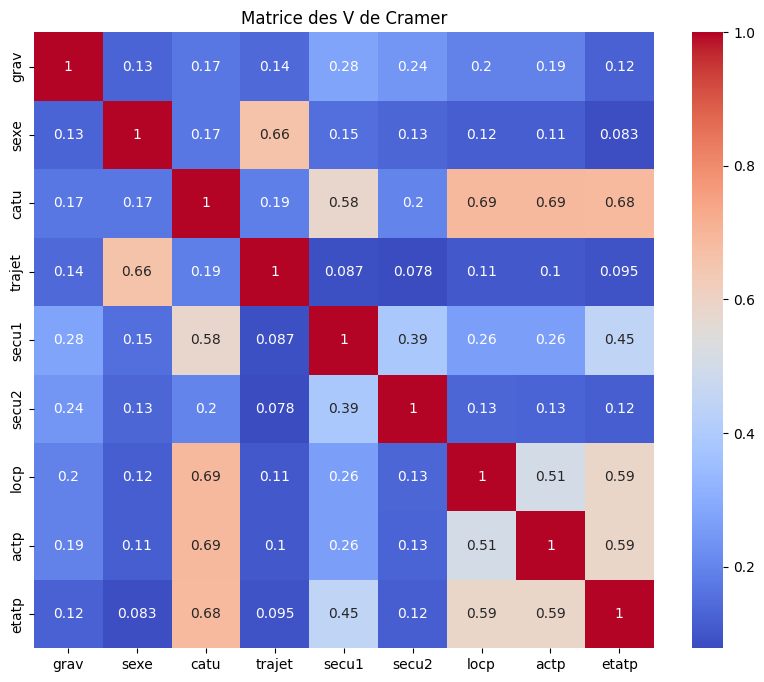

In [108]:
colonnes_a_inclure1 = ["grav","sexe", "catu", "trajet", "secu1", "secu2", "locp", "actp","etatp"]
matrice_v_cramer(df_merge,colonnes_a_inclure1)

En examinant les relations entre les variables dans cette matrice des V de Cramer, plusieurs dépendances intéressantes apparaissent :
sexe et trajet ont une corrélation notable avec un coefficient de 0,66, indiquant une forte relation entre le genre et le type de trajet. Cela pourrait refléter des différences dans les habitudes ou les comportements de déplacement entre hommes et femmes.
catu et secu1 affichent une relation modérée avec un V de Cramer de 0,58, suggérant que la catégorie d'usager influence le dispositif de sécurité1.
Une forte dépendance est également observée entre catu et locp (0,69) et entre catu et actp (0,69), ce qui indique que la catégorie d'usager est fortement liée à la localisation précise de l'accident ainsi qu'à l'action du piéton.
locp et actp et locp et etap présentent des relations modérées à 0,51 et 0,59, respectivement, révélant une connexion entre la localisation des accidents, l'action du piéton, et les état du piéton.
De plus, actp et etap ont également une relation notable avec un V de Cramer de 0,59, ce qui montre que l'action du piéton est intimement liée à les état du piéton.
En revanche, certaines variables comme trajet et locp (0,11) ou sexe et locp (0,12) montrent des corrélations très faibles, indiquant des relations peu significatives entre ces paires de variables.
Globalement, les relations les plus fortes sont centrées autour de catu, locp, actp, et etap

En se concentrant sur les relations avec la variable cible "grav" (gravité des accidents), voici les observations principales :
secu1 (Equipement de sécurité1) présente une dépendance modérée avec "grav" avec un V de Cramer de 0,28, ce qui suggère une certaine influence sur la gravité des accidents.
secu2 (Dispositif de sécurité2) a une corrélation plus faible avec "grav" à 0,24, montrant une influence moindre par rapport à "secu1".
catu (catégorie d'usager) affiche une valeur de 0,17, indiquant une faible dépendance mais non négligeable.
trajet (type de trajet) et locp (localisation piéton) ont des V de Cramer relativement faibles, à 0,14 et 0,2 respectivement, montrant qu'ils influencent faiblement "grav".
sexe (sexe) et actp (action du piéton) ont des coefficients très faibles, à 0,13 et 0,19 respectivement, indiquant qu'ils n'ont qu'une influence mineure.
Enfin, etap (état du piéton) est la variable la moins corrélée avec "grav", avec un V de Cramer de 0,12.

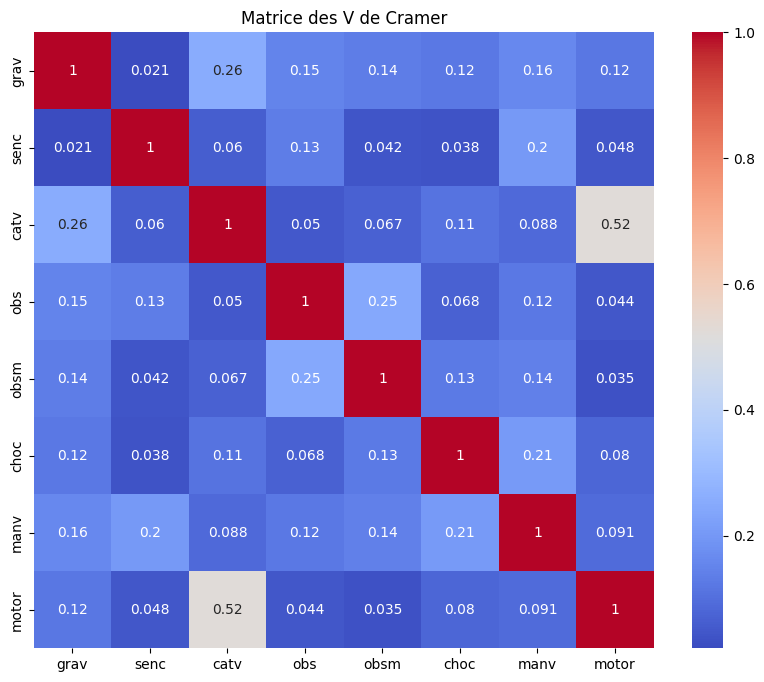

In [111]:
colonnes_a_inclure2 = ["grav","senc", "catv", "obs", "obsm", "choc", "manv", "motor"]
matrice_v_cramer(df_merge,colonnes_a_inclure2) 

Relations avec la variable cible "grav" :
catv (catégorie du véhicule) montre une corrélation modérée avec grav avec un coefficient de 0,26, indiquant une influence notable de ce facteur sur la gravité des accidents.
obs (obstacle) et manv (manœuvre) présentent des relations faibles mais existantes avec grav, avec des coefficients respectifs de 0,15 et 0,16.
Les autres variables, comme senc (sens de circulation) (0,021), obsm (obstacle mobile) (0,14), choc (type de choc) (0,12), et motor (motorisation) (0,12), montrent des corrélations très faibles avec grav, suggérant qu’elles ont un impact limité sur la gravité.

Relations entre les variables :
catv et motor affichent une corrélation forte (0,52), indiquant que la catégorie du véhicule est étroitement liée à son type de motorisation. Cela reflète logiquement une relation technique ou structurelle entre ces deux caractéristiques.
obs et obsm montrent une relation modérée avec un coefficient de 0,25, suggérant que la présence d’un obstacle est souvent associée à un obstacle mobile.
manv et choc présentent également une corrélation modérée à 0,21, indiquant que la manœuvre effectuée au moment de l’accident est liée au point de choc initial.
Les autres relations entre les variables, comme senc et obs (0,13) ou obsm et choc (0,13), restent faibles, suggérant une interdépendance moins significative.

#### Test de significativité des V de Cramer

In [ ]:
# ajout du libellé des départements

df_code_dep=df_dep[["DEP","LIBELLE"]]
#df_code_com=df_com[["COM","LIBELLE"]]
df_merge=pd.merge(left=df_merge, right=df_code_dep,left_on="dep", right_on="DEP", how="left")
#database=pd.merge(left=df_merge, right=df_code_com,left_on="com", right_on="COM", how="left")
database=df_merge.drop(["DEP"], axis=1)
database.info()

In [ ]:
print(f"la base usagers a {df_usagers.shape[0]} observations et {df_usagers.shape[1]} variables.")

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
grav_dict={-1:"Non renseigné",1:'Indemne',2:"Tué",3:'Bléssé hospitalisé',4:'Blessé leger'}
grav_nv=df_usagers['grav'].replace(grav_dict)
grav_prct=(grav_nv.value_counts()/df_usagers.shape[0])*100
grav_prct.plot(kind="bar")
plt.xticks(rotation=30)
plt.xlabel("Gravité de l'accident")
plt.ylabel("percentage(%)")

plt.subplot(1,2,2)
catu_dict={1:"Conducteur",2:"Passager",3:"Piéton"}
catu_nv=df_usagers['catu'].replace(catu_dict)
catu_prct=(catu_nv.value_counts()/df_usagers.shape[0])*100
catu_prct.plot(kind="bar")
plt.xticks(rotation=30)
plt.xlabel("Catégorie d'usager")
plt.ylabel("percentage(%)")


In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
sexe_dict={1:"Homme",2:"Femme"}
sexe_nv=df_usagers['sexe'].replace(sexe_dict)
sexe_prct=(sexe_nv.value_counts()/df_usagers.shape[0])*100
sexe_prct.plot(kind="bar")
plt.xticks(rotation=45)
plt.xlabel("Sexe")
plt.ylabel("percentage(%)")


plt.subplot(1,2,2)
#grav_dict={-1:"Non renseigné",1:'Indemne',2:"Tué",3:'Bléssé hospitalisé',4:'Blessé leger'}
#grav_nv=df_usagers['grav'].replace(grav_dict)
grav_prct=(df_usagers['trajet'].value_counts()/df_usagers.shape[0])*100
grav_prct.plot(kind="bar")
plt.xticks(rotation=30)
plt.xlabel("Gravité de l'accident")
plt.ylabel("percentage(%)")


In [ ]:
#cration carte
import geopandas as gpd

### 3)- Description de la base lieux

In [ ]:
df_lieux.head()

In [ ]:
catr_labels = {
    1: "Autoroute",
    2: "Route nationale",
    3: "Route départementale",
    4: "Voie communale",
    5: "Hors réseau public",
    6: "Parc de stationnement",
    7: "Routes de métropole urbaine",
    9: "Autre"
}

circ_labels = {
    -1: "Non renseigné",
    1: "À sens unique",
    2: "Bidirectionnelle",
    3: "À chaussées séparées",
    4: "Avec voies d’affectation variable"
}

vosp_labels = {
    -1: "Non renseigné",
    0: "Sans objet",
    1: "Piste cyclable",
    2: "Bande cyclable",
    3: "Voie réservée"
}

prof_labels = {
    -1: "Non renseigné",
    1: "Plat",
    2: "Pente",
    3: "Sommet de côte",
    4: "Bas de côte"
}

plan_labels = {
    -1: "Non renseigné",
    1: "Partie rectiligne",
    2: "En courbe à gauche",
    3: "En courbe à droite",
    4: "En 'S'"
}

surf_labels = {
    -1: "Non renseigné",
    1: "Normale",
    2: "Mouillée",
    3: "Flaques",
    4: "Inondée",
    5: "Enneigée",
    6: "Boue",
    7: "Verglacée",
    8: "Corps gras – huile",
    9: "Autre"
}

infra_labels = {
    -1: "Non renseigné",
    0: "Aucun",
    1: "Souterrain - tunnel",
    2: "Pont - autopont",
    3: "Bretelle d’échangeur",
    4: "Voie ferrée",
    5: "Carrefour aménagé",
    6: "Zone piétonne",
    7: "Zone de péage",
    8: "Chantier",
    9: "Autres"
}

situ_labels = {
    -1: "Non renseigné",
    0: "Aucun",
    1: "Sur chaussée",
    2: "Sur bande d’arrêt d’urgence",
    3: "Sur accotement",
    4: "Sur trottoir",
    5: "Sur piste cyclable",
    6: "Sur autre voie spéciale",
    8: "Autres"
}


In [ ]:
# Comptage des occurrences par catégorie de route
catr_counts = df_lieux['catr'].value_counts().sort_index()

# Remplacement des codes par les labels pour l'affichage
catr_counts.index = catr_counts.index.map(catr_labels)

# Création du diagramme
plt.figure(figsize=(10, 6))
catr_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Nombre d'accidents par type de route (catr)")
plt.xlabel("Type de route")
plt.ylabel("Nombre d'accidents")
plt.xticks(rotation=45)
plt.tight_layout()

# Affichage du graphique
plt.show()

### 3)- Description de la base Caract

In [ ]:
df_caract.head()

In [ ]:
lum_labels = {
    1: "Plein jour",
    2: "Crépuscule ou aube",
    3: "Nuit sans éclairage public",
    4: "Nuit avec éclairage public non allumé",
    5: "Nuit avec éclairage public allumé"
}

agg_labels = {
    1: "Hors agglomération",
    2: "En agglomération"
}

int_labels = {
    1: "Hors intersection",
    2: "Intersection en X",
    3: "Intersection en T",
    4: "Intersection en Y",
    5: "Intersection à plus de 4 branches",
    6: "Giratoire",
    7: "Place",
    8: "Passage à niveau",
    9: "Autre intersection"
}

atm_labels = {
    -1: "Non renseigné",
    1: "Normale",
    2: "Pluie légère",
    3: "Pluie forte",
    4: "Neige - grêle",
    5: "Brouillard - fumée",
    6: "Vent fort - tempête",
    7: "Temps éblouissant",
    8: "Temps couvert",
    9: "Autre"
}

col_labels = {
    -1: "Non renseigné",
    1: "Deux véhicules - frontale",
    2: "Deux véhicules – par l’arrière",
    3: "Deux véhicules – par le côté",
    4: "Trois véhicules et plus – en chaîne",
    5: "Trois véhicules et plus - collisions multiples",
    6: "Autre collision",
    7: "Sans collision"
}


In [ ]:
# Calcul des pourcentages d'accidents par mois
mois_counts = df_caract['mois'].value_counts(normalize=True).sort_index() * 100

# Création du diagramme avec pourcentages
plt.figure(figsize=(10, 6))
mois_counts.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title("Pourcentage d'accidents par mois")
plt.xlabel("Mois")
plt.ylabel("Pourcentage d'accidents")
plt.xticks(ticks=range(len(mois_counts)), labels=[
    "Janvier", "Février", "Mars", "Avril", "Mai", "Juin", 
    "Juillet", "Août", "Septembre", "Octobre", "Novembre", "Décembre"
], rotation=45)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0f}%'))
plt.tight_layout()

# Affichage du graphique
plt.show()

In [ ]:
# Filtrer les données pour le mois d'octobre (mois = 10)
octobre_data = df_caract[df_caract['mois'] == 10]

# Croiser les accidents d'octobre avec les conditions atmosphériques (atm)
atm_counts = octobre_data['atm'].value_counts().sort_index()

# Remplacer les codes par leurs labels pour l'affichage
atm_counts.index = atm_counts.index.map(atm_labels)

# Création du diagramme
plt.figure(figsize=(10, 6))
atm_counts.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title("Nombre d'accidents en octobre par conditions atmosphériques (atm)")
plt.xlabel("Conditions atmosphériques")
plt.ylabel("Nombre d'accidents")
plt.xticks(rotation=45)
plt.tight_layout()

# Affichage du graphique
plt.show()

In [ ]:
accidents_par_departement = df_caract.groupby('dep').size().reset_index(name='nombre_accidents')
accidents_par_departement.head()

In [ ]:
france_map = gpd.read_file("https://france-geojson.gregoiredavid.fr/repo/departements.geojson")
france_map = france_map.merge(accidents_par_departement, left_on="code", right_on="dep")
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
france_map.plot(column="nombre_accidents", cmap="OrRd", linewidth=0.8, ax=ax, edgecolor="0.8", legend=True)

plt.title("Nombre d'accidents de la route par département")
plt.axis("off")
plt.show()#i

In [ ]:
dep_IDF = ["75", "77", "78", "91", "92", "93", "94", "95"]
accidents_idf = df_caract[df_caract['dep'].isin(dep_IDF)]

# Remplacer les virgules par des points et convertir en float
accidents_idf['lat'] = accidents_idf['lat'].str.replace(',', '.').astype(float)
accidents_idf['long'] = accidents_idf['long'].str.replace(',', '.').astype(float)

accidents_idf.head()

In [ ]:
import folium
from folium.plugins import HeatMap

accidents_coords = accidents_idf[['lat', 'long']].dropna()

# Initialiser la carte centrée sur l'Île-de-France
map_idf = folium.Map(location=[48.8566, 2.3522], zoom_start=10)

# Ajouter la carte de densité
HeatMap(
    data=accidents_coords.values,
    radius=10,               
    blur=15,                 
    max_zoom=10,             
    min_opacity=0.2,         
    gradient={               
        0.2: 'blue',
        0.4: 'lime',
        0.6: 'yellow',
        0.8: 'orange',
        1.0: 'red'
    }
).add_to(map_idf)

# Afficher la carte
map_idf

## **II- Relation variables-target**

## **III- Modélisation**

In [ ]:
## recoder la variable catv car elle a beaucoup de catégories

### 1- Construction de la base de données pour la modélisation

Nous allons nous servir de la base de données fusionnée au début du projet.

Nous commençons par supprimer les variables qui ne sont pas pertinentes pour la modélisation. Il s'agit principalement des variables d'identification.

In [ ]:
var=["Num_Acc","jour","an","com","adr","lat","long","voie","v1","v2","id_vehicule","num_veh","id_usager", "dep"]
Num_acc=df_merge["Num_Acc"]
df_merge.drop(var, axis=1,inplace=True)

Nous allons par la suite visualiser le pourcentage de valeurs manquantes de la base:

In [ ]:
df_merge.isna().sum()[df_merge.isna().sum()!=0]/len(df_merge)*100

Nous supprimons les variables qui ont plus de 90% de valeurs manquantes car elles n'apportent pas vraiment d'informations.

In [ ]:
df_merge.drop(["occutc","lartpc"], axis=1, inplace=True)

Ensuite, nous déduisons de la variable "an_nais" (année de naissance), l'âge des individus, et nous remplaçons les valeurs manquantes par la médiane car elle est moins sensible aux valeurs abbérantes.

In [ ]:
df_merge["Age"] = 2023-df_merge["an_nais"]
df_merge["Age"]=df_merge["Age"].fillna(df_merge["Age"].median())

Nous allons nous servir de la base de données fusionnée au début du projet.

Nous commençons par supprimer les variables qui ne sont pas pertinentes pour la modélisation. Il s'agit principalement des variables d'identification.

In [ ]:
var=["Num_Acc","jour","an","com","adr","lat","long","voie","v1","v2","id_vehicule","num_veh","id_usager", "dep"]
Num_acc=df_merge["Num_Acc"]
df_merge.drop(var, axis=1,inplace=True)

De l'analyse descriptive, les variables qui semblent avoir plus d'influence sur la gravité de l'accident sont: ...

On restreint la base de données à ces variables.

## **Conclusion**